# Предварительный анализ и очистка датасета

In [ ]:
# методами unique и value_counts проверены все столбцы-категории
main_full['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [ ]:
main_full['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      38207
High_spent_Medium_value_payments    26462
Low_spent_Medium_value_payments     20698
High_spent_Large_value_payments     20565
High_spent_Small_value_payments     16991
Low_spent_Large_value_payments      15677
!@9#%8                              11400
Name: Payment_Behaviour, dtype: int64

In [ ]:
# в итоге, должны быть заменены на nan: “-500”, #F%$D@*&8 , “_______”, “-1”, “-100”, числа от -5 до -1, “-1_”, “-2_”, “-3_”, “_”, “NA”, “NM”, “__10000__”, “!@9#%8”, “__-333333333333333333333333333__”
missed = ['-500', '#F%$D@*&8' , '_______', '-1_', '-2_','-3_', '-1', '-2','-3', '-4', '-5', '-100', '_', 'NA', 'NM', '__10000__', '!@9#%8', '__-333333333333333333333333333__']


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
main_train = pd.read_csv("train.csv", na_values = missed)
main_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       99114 non-null   object 
 5   SSN                       94428 non-null   object 
 6   Occupation                92938 non-null   object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         99979 non-null   float64
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               96124 non-null   object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
main_test = pd.read_csv("test.csv", na_values = missed)
main_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       49536 non-null  object 
 5   SSN                       47172 non-null  object 
 6   Occupation                46562 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         49984 non-null  float64
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               48026 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [ ]:
# склеивание датасетов для получения полного исходного
main_full = pd.concat([main_train, main_test]).reset_index().drop(columns = 'index')

In [ ]:
main_full.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
149995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10.0,...,NaN,3571.7,34.780553,NaN,Yes,60.964772,146.486325,Low_spent_Small_value_payments,275.539570,NaN
149996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4.0,...,Good,502.38,27.758522,31 Years and 11 Months,NaN,35.104023,181.442999,Low_spent_Small_value_payments,409.394562,NaN
149997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,NaN,Low_spent_Large_value_payments,349.726332,NaN
149998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4.0,...,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.598580,High_spent_Small_value_payments,463.238981,NaN
149999,0x25ff1,CUS_0x942c,December,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,NaN,502.38,34.108530,32 Years and 2 Months,No,35.104023,220.457878,Low_spent_Medium_value_payments,360.379683,NaN


In [ ]:
# Проверка, что исходные датасеты train и test были разделены так, что в оба попали одни и те же заемщики
uniq_customer_train = set(main_train.Customer_ID.unique())
uniq_customer_test = set(main_test.Customer_ID.unique())

len(uniq_customer_train - uniq_customer_test) == 0 and len(uniq_customer_test - uniq_customer_train) == 0

True

In [ ]:
# проверка, нет ли полных дубликатов
main_full.duplicated().sum()

0

In [ ]:
main_full.groupby('Customer_ID')['SSN'].nunique()

Customer_ID
CUS_0x1000    1
CUS_0x1009    1
CUS_0x100b    1
CUS_0x1011    1
CUS_0x1013    1
             ..
CUS_0xff3     1
CUS_0xff4     1
CUS_0xff6     1
CUS_0xffc     1
CUS_0xffd     1
Name: SSN, Length: 12500, dtype: int64

In [ ]:
# с виду корректные значения содержат лишние символы, например, в конце:
main_full.Annual_Income.unique()[1:20]

array(['34847.84', '34847.84_', '143162.64', '30689.89', '30689.89_',
       '35547.71_', '35547.71', '73928.46', '131313.4', '10909427.0',
       '34081.38_', '34081.38', '114838.41', '114838.41_', '31370.8',
       '33751.27', '88640.24', '88640.24_', '54392.16'], dtype=object)

In [ ]:
# удаление лишних символов, содержащихся в корректных значениях в определенных столбцах
main_full_clean = main_full.copy()
main_full_clean['Name'] = main_full_clean['Name'].str.replace(', ', '')
main_full_clean['Name'] = main_full_clean['Name'].str.replace('"', '')
main_full_clean['Age'] = main_full_clean['Age'].str.replace('_', '')
main_full_clean['Annual_Income'] = main_full_clean['Annual_Income'].str.replace('_', '')
main_full_clean['Num_of_Loan'] = main_full_clean['Num_of_Loan'].str.replace('_', '')
main_full_clean['Num_of_Delayed_Payment'] = main_full_clean['Num_of_Delayed_Payment'].str.replace('_', '')
main_full_clean['Credit_Mix'] = main_full_clean['Credit_Mix'].str.replace('_', '')
main_full_clean['Outstanding_Debt'] = main_full_clean['Outstanding_Debt'].str.replace('_', '')

In [ ]:
# функция для перевода строк из Credit_History_Age в месяцы
def ch_to_months(x):
    if pd.isnull(x):
      return x
    else:
      months = 0
      string1 = str(x).split(' ')
      months = months + (int(string1[0]) * 12 + int(string1[3]))
      return  months

# проверка работы функции
ch_to_months('22 Years and 3 Months')

267

In [ ]:
main_full_clean.Credit_History_Age = main_full_clean.Credit_History_Age.apply(ch_to_months)

In [ ]:
# далее нужно разобраться с ведущим нулем в одной из колонок и найти выбросы. Для этого нужно задать подходящие типы данных колонкам. Сейчас так:
main_full_clean.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment       object
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

In [ ]:
# перевод числовых значений в Int16 или Float32
# для  object сначала удаление лишних пробелов и перевод в float, потом перевод в Int16 или Float32. Т.к. сразу из object в Int16/Float32 (nullable) не получится
#df.column = df.column.apply(lambda x: float(x)).apply(lambda x: int(x))
main_full_clean.Age = main_full_clean.Age.str.strip()
main_full_clean.Age = main_full_clean.Age.astype('float').astype('Int16')
main_full_clean.Num_of_Loan = main_full_clean.Num_of_Loan.str.strip()
main_full_clean.Num_of_Loan = main_full_clean.Num_of_Loan.astype('float').astype('Int16')
main_full_clean.Num_of_Delayed_Payment = main_full_clean.Num_of_Delayed_Payment.str.strip()
main_full_clean.Num_of_Delayed_Payment = main_full_clean.Num_of_Delayed_Payment.astype('float').astype('Int16')

main_full_clean.Annual_Income = main_full_clean.Annual_Income.str.strip()
main_full_clean.Annual_Income = main_full_clean.Annual_Income.astype('float').astype('Float32')
main_full_clean.Outstanding_Debt = main_full_clean.Outstanding_Debt.str.strip()
main_full_clean.Outstanding_Debt = main_full_clean.Outstanding_Debt.astype('float').astype('Float32')

main_full_clean.Credit_History_Age = main_full_clean.Credit_History_Age.astype('Int16')
main_full_clean.Num_Bank_Accounts = main_full_clean.Num_Bank_Accounts.astype('Int16')
main_full_clean.Num_Credit_Card = main_full_clean.Num_Credit_Card.astype('Int16')
main_full_clean.Interest_Rate = main_full_clean.Interest_Rate.astype('Int16')

main_full_clean.Monthly_Inhand_Salary = main_full_clean.Monthly_Inhand_Salary.astype('Float32')
main_full_clean.Delay_from_due_date = main_full_clean.Delay_from_due_date.astype('Float32')
main_full_clean.Changed_Credit_Limit = main_full_clean.Changed_Credit_Limit.astype('Float32')
main_full_clean.Num_Credit_Inquiries = main_full_clean.Num_Credit_Inquiries.astype('Float32')
main_full_clean.Credit_Utilization_Ratio = main_full_clean.Credit_Utilization_Ratio.astype('Float32')
main_full_clean.Total_EMI_per_month = main_full_clean.Total_EMI_per_month.astype('Float32')
main_full_clean.Amount_invested_monthly = main_full_clean.Amount_invested_monthly.astype('Float32')
main_full_clean.Monthly_Balance = main_full_clean.Monthly_Balance.astype('Float32')

In [ ]:
main_full_clean.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                           Int16
SSN                          object
Occupation                   object
Annual_Income               Float32
Monthly_Inhand_Salary       Float32
Num_Bank_Accounts             Int16
Num_Credit_Card               Int16
Interest_Rate                 Int16
Num_of_Loan                   Int16
Type_of_Loan                 object
Delay_from_due_date         Float32
Num_of_Delayed_Payment        Int16
Changed_Credit_Limit        Float32
Num_Credit_Inquiries        Float32
Credit_Mix                   object
Outstanding_Debt            Float32
Credit_Utilization_Ratio    Float32
Credit_History_Age            Int16
Payment_of_Min_Amount        object
Total_EMI_per_month         Float32
Amount_invested_monthly     Float32
Payment_Behaviour            object
Monthly_Balance             Float32
Credit_Score                

In [ ]:
# замена на NaN неправдоподобных значений у целочисленных признаков
main_full_clean.loc[(main_full_clean['Age'] > 56), 'Age'] = np.nan
main_full_clean.loc[(main_full_clean['Num_Bank_Accounts'] > 11), 'Num_Bank_Accounts'] = np.nan
main_full_clean.loc[(main_full_clean['Num_Credit_Card'] > 11), 'Num_Credit_Card'] = np.nan
main_full_clean.loc[(main_full_clean['Interest_Rate'] > 34), 'Interest_Rate'] = np.nan
main_full_clean.loc[(main_full_clean['Num_of_Loan'] > 9), 'Num_of_Loan'] = np.nan
main_full_clean.loc[(main_full_clean['Num_Credit_Inquiries'] > 17), 'Num_Credit_Inquiries'] = np.nan

In [ ]:
# анализ числовых значений датасета
main_full_clean.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,145816.0,150000.0,127500.0,148013.0,146550.0,147000.0,143420.0,149111.0,138569.0,146833.0,144504.0,150000.0,150000.0,136500.0,150000.0,136770.0,148223.0
mean,33.487882,173055.208107,4190.104345,5.36915,5.533095,14.531585,3.534319,21.20252,31.130852,10.385765,6.283086,1426.220373,32.283307,223.215326,1432.5136,195.305286,402.722924
std,10.772032,1404214.625,3180.489656,2.592672,2.069293,8.741031,2.446927,14.794127,225.27108,6.785539,3.956196,1155.127075,5.113316,99.719548,8403.759766,198.599612,213.844776
min,14.0,7005.930176,303.645416,0.0,0.0,1.0,0.0,0.0,0.0,-6.49,0.0,0.23,20.0,1.0,0.0,0.0,0.00776
25%,25.0,19455.490234,1625.265869,3.0,4.0,7.0,2.0,10.0,9.0,5.34,3.0,566.07251,28.05473,146.0,30.947775,72.232193,270.241882
50%,33.0,37578.609375,3091.0,5.0,5.0,13.0,3.0,18.0,14.0,9.41,6.0,1166.154968,32.297058,222.0,71.280006,128.984787,336.815857
75%,42.0,72796.90625,5948.45459,7.0,7.0,20.0,5.0,28.0,18.0,14.84,9.0,1945.962555,36.487954,304.0,166.279556,236.844299,470.477905
max,56.0,24198062.0,15204.633789,11.0,11.0,34.0,9.0,67.0,4399.0,36.970001,17.0,4998.069824,50.0,408.0,82398.0,1977.32605,1606.518188


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>],
       [<Axes: title={'center': 'Num_Credit_Card'}>,
        <Axes: title={'center': 'Interest_Rate'}>,
        <Axes: title={'center': 'Num_of_Loan'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>],
       [<Axes: title={'center': 'Num_of_Delayed_Payment'}>,
        <Axes: title={'center': 'Changed_Credit_Limit'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>,
        <Axes: title={'center': 'Outstanding_Debt'}>],
       [<Axes: title={'center': 'Credit_Utilization_Ratio'}>,
        <Axes: title={'center': 'Credit_History_Age'}>,
        <Axes: title={'center': 'Total_EMI_per_month'}>,
        <Axes: title={'center': 'Amount_invested_monthly'}>],
       [<Axes: title={'center': 'Monthly_Balance'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

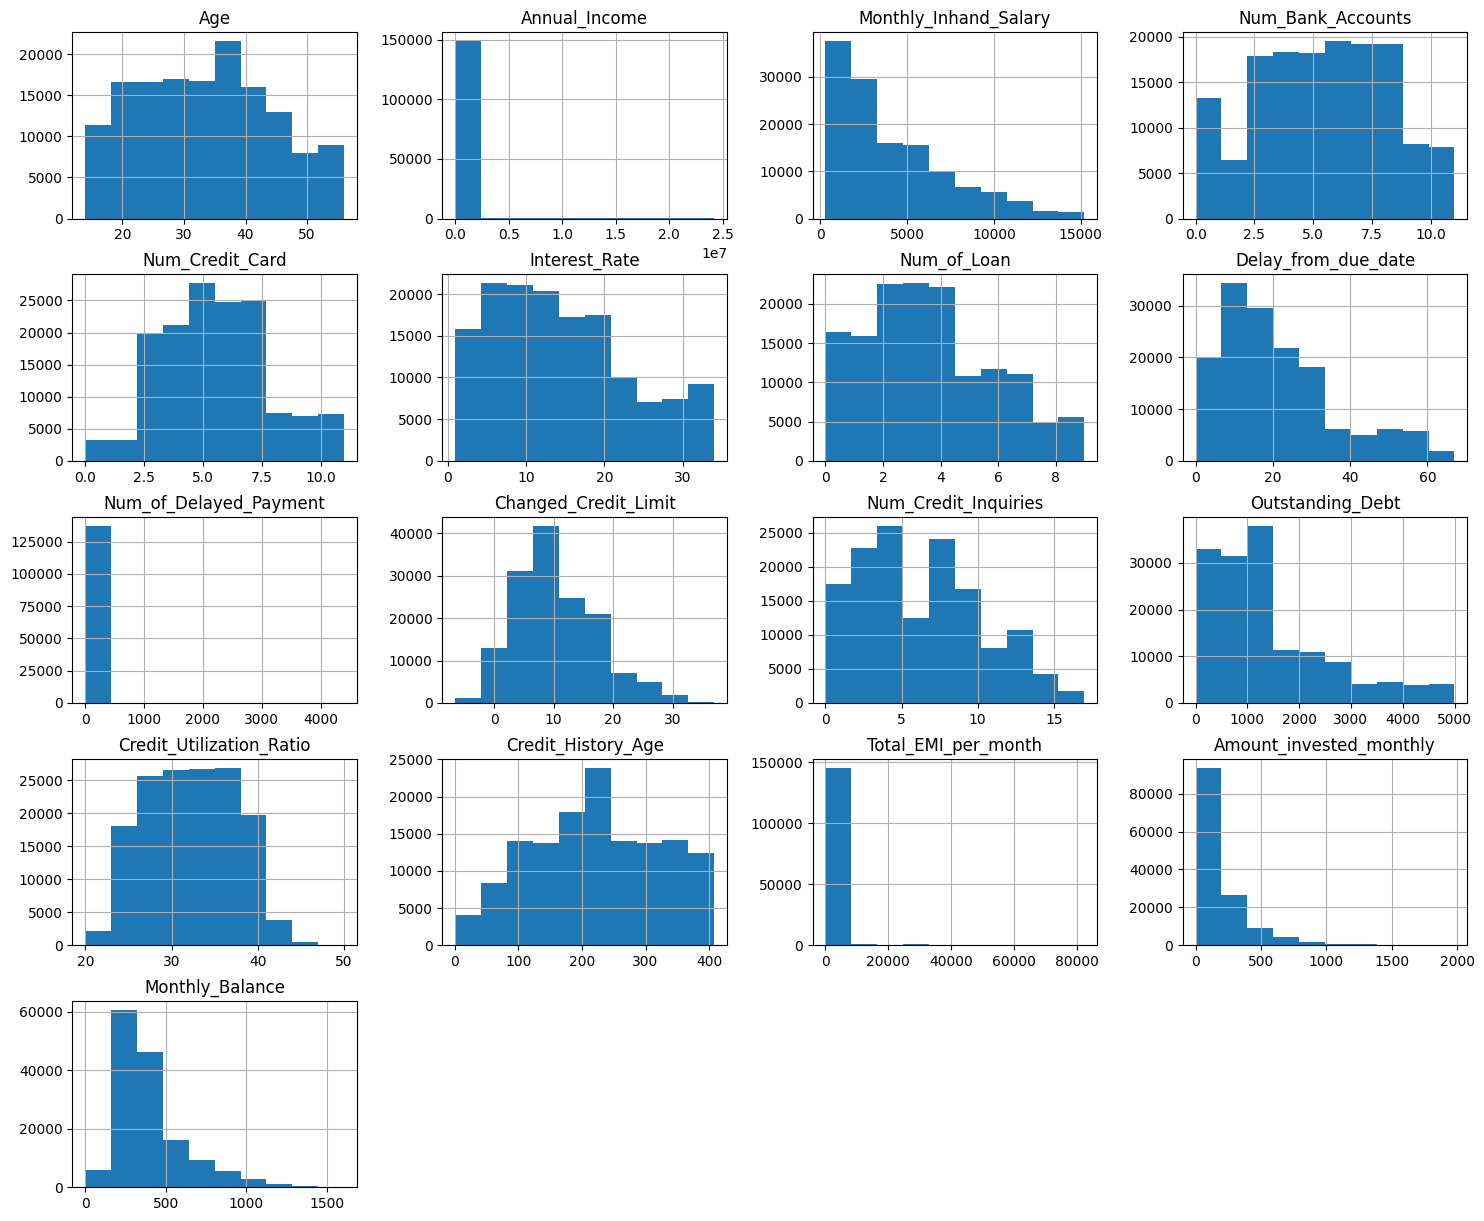

In [ ]:
main_full_clean.select_dtypes(include = ['Int16', 'Float32']).hist(figsize = (18, 15))

In [ ]:
# Поиск выбросов с целью, в том числе, нахождения фактических ошибок в данных
'''
В Age, Num_Bank_Accounts, Num_Credit_Card, Credit_Utilization_Ratio, Credit_History_Age выбросов нет.
В Annual_Income не удалось найти такую верхнюю границу, чтобы выбросы были очевидны. По смыслу это значение может быть не ограничено, а по графику видно, что распределение очень неравномерное.
В Outstanding_Debt, Num_Credit_Inquiries распределение имеет некоторую закономерность. При этом если некоторое значение велико, то такое значение указано во всех строках для одного Customer_ID. Считаю, что это не выбросы.
В Monthly_Inhand_Salary, Interest_Rate, Num_of_Loan считаю, что выбросов нет.
В Delay_from_due_date и Num_of_Delayed_Payment, Changed_Credit_Limit, Amount_invested_monthly, Monthly_Balance есть значения, которые можно признать выбросами. Возможно, лучше удалить эти строки,
если эти признаки будут использоваться в модели, т. к. значение может быть в том числе ошибкой.
В Total_EMI_per_month распределение самое неравномерное. Но есть явные выбросы, которых много, возможно, их стоит удалить.
'''

q1 = main_full_clean['Monthly_Balance'].quantile(0.25)
q3 = main_full_clean['Monthly_Balance'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (5.3 * iqr)
upper_bound = q3 + (5.3 * iqr)
# посмотреть на выбросы так
main_full_clean.loc[(~main_full_clean['Monthly_Balance'].between(lower_bound, upper_bound, inclusive = 'both')) & (~main_full_clean['Monthly_Balance'].isna())]['Monthly_Balance']
# или так
#main_full_clean[~main_full_clean['Monthly_Balance'].between(lower_bound, upper_bound, inclusive='both')]
#main_full_clean[~main_full_clean['Num_Credit_Card'].between(0, 10, inclusive = 'both')]

2933      1534.963501
7475       1576.28894
9376      1602.040527
9382      1533.102295
15878     1564.134766
17029     1566.613159
33072     1567.208252
33076      1555.20105
34161     1558.421875
62954     1542.274658
68000     1552.946045
96432      1546.31958
104690     1566.12561
106636    1548.204224
110792    1553.386597
116536    1606.518188
116537    1540.935913
131152    1546.264771
134003    1553.841675
143799    1550.852051
Name: Monthly_Balance, dtype: Float32

In [ ]:
main_full_clean.ID = main_full_clean.ID.astype('category')
main_full_clean.Customer_ID = main_full_clean.Customer_ID.astype('category')
main_full_clean.Month = main_full_clean.Month.astype('category')
main_full_clean.Name = main_full_clean.Name.astype('category')
main_full_clean.SSN = main_full_clean.SSN.astype('category')
main_full_clean.Occupation = main_full_clean.Occupation.astype('category')
main_full_clean.Type_of_Loan = main_full_clean.Type_of_Loan.astype('category')
main_full_clean.Credit_Mix = main_full_clean.Credit_Mix.astype('category')
main_full_clean.Payment_of_Min_Amount = main_full_clean.Payment_of_Min_Amount.astype('category')
main_full_clean.Payment_Behaviour = main_full_clean.Payment_Behaviour.astype('category')
main_full_clean.Credit_Score = main_full_clean.Credit_Score.astype('category')

In [ ]:
# анализ категорий
main_full_clean.select_dtypes(include = ['category']).describe()

,ID,Customer_ID,Month,Name,SSN,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,150000,150000,150000,135000,141600,139500,132888,120000,132000,138600,100000
unique,150000,12500,12,10131,12500,15,6260,3,2,6,3
top,0x10000,CUS_0x1000,April,Stevex,000-08-1349,Lawyer,Not Specified,Standard,Yes,Low_spent_Small_value_payments,Standard
freq,1,12,12500,66,12,9899,2112,54858,78484,38207,53174


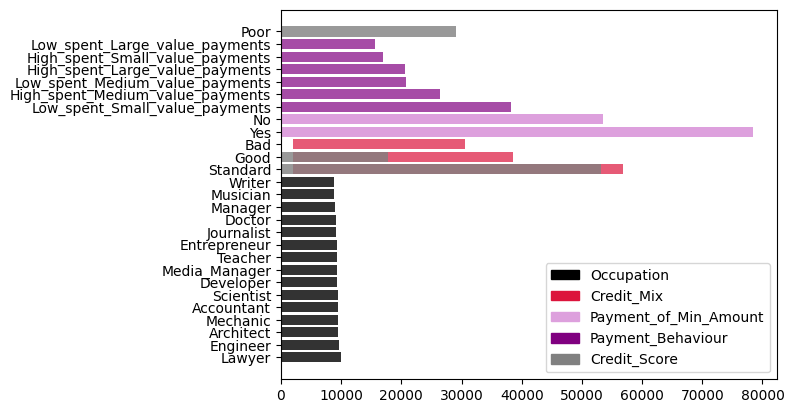

In [ ]:
# построение диаграммы для категорий. Категории, являющиеся идентификаторами не рассмотрены, т.к. не будут использоваться как признаки в модели.
'''
Также исключена из анализа колонка Type_of_Loan, т. к. содержит перечисления через запятую в различном порядке типы кредитов.
Такую строку сложно преобразовать в имеющую смысл, при этом, как видно, большинство значений в ней - 'Not Specified', в чем мало смысла первоначально.
Плюс, в датасете уже есть схожая по смыслу колонка с числовым значением - Num_of_Loan (количество кредитов),
совпадающая с Type_of_Loan по числу перечисленных в Type_of_Loan типов.

Диаграмма показывает, что наиболее сбалансированные признаки - это Occupation и Payment_Behaviour.
'''
import matplotlib.patches as mpatches
cat_counts1 = main_full_clean['Occupation'].value_counts()
cat_counts2 = main_full_clean['Credit_Mix'].value_counts()
cat_counts3 = main_full_clean['Payment_of_Min_Amount'].value_counts()
cat_counts4 = main_full_clean['Payment_Behaviour'].value_counts()
cat_counts5 = main_full_clean['Credit_Score'].value_counts()

plt.barh(cat_counts1.index, cat_counts1.values, color = 'black', alpha = 0.8)
plt.barh(cat_counts2.index, cat_counts2.values, color = 'crimson', left = 2000, alpha = 0.7)
plt.barh(cat_counts3.index, cat_counts3.values, color = 'plum')
plt.barh(cat_counts4.index, cat_counts4.values, color = 'purple', alpha = 0.7)
plt.barh(cat_counts5.index, cat_counts5.values, color = 'grey', alpha = 0.8)

bk_patch = mpatches.Patch(color='black', label ='Occupation')
rd_patch = mpatches.Patch(color='crimson', label ='Credit_Mix')
pk_patch = mpatches.Patch(color='plum', label ='Payment_of_Min_Amount')
pp_patch = mpatches.Patch(color='purple', label ='Payment_Behaviour')
gy_patch = mpatches.Patch(color='grey', label ='Credit_Score')
plt.legend(handles=[bk_patch, rd_patch, pk_patch, pp_patch, gy_patch])

In [ ]:
import missingno

<Axes: >

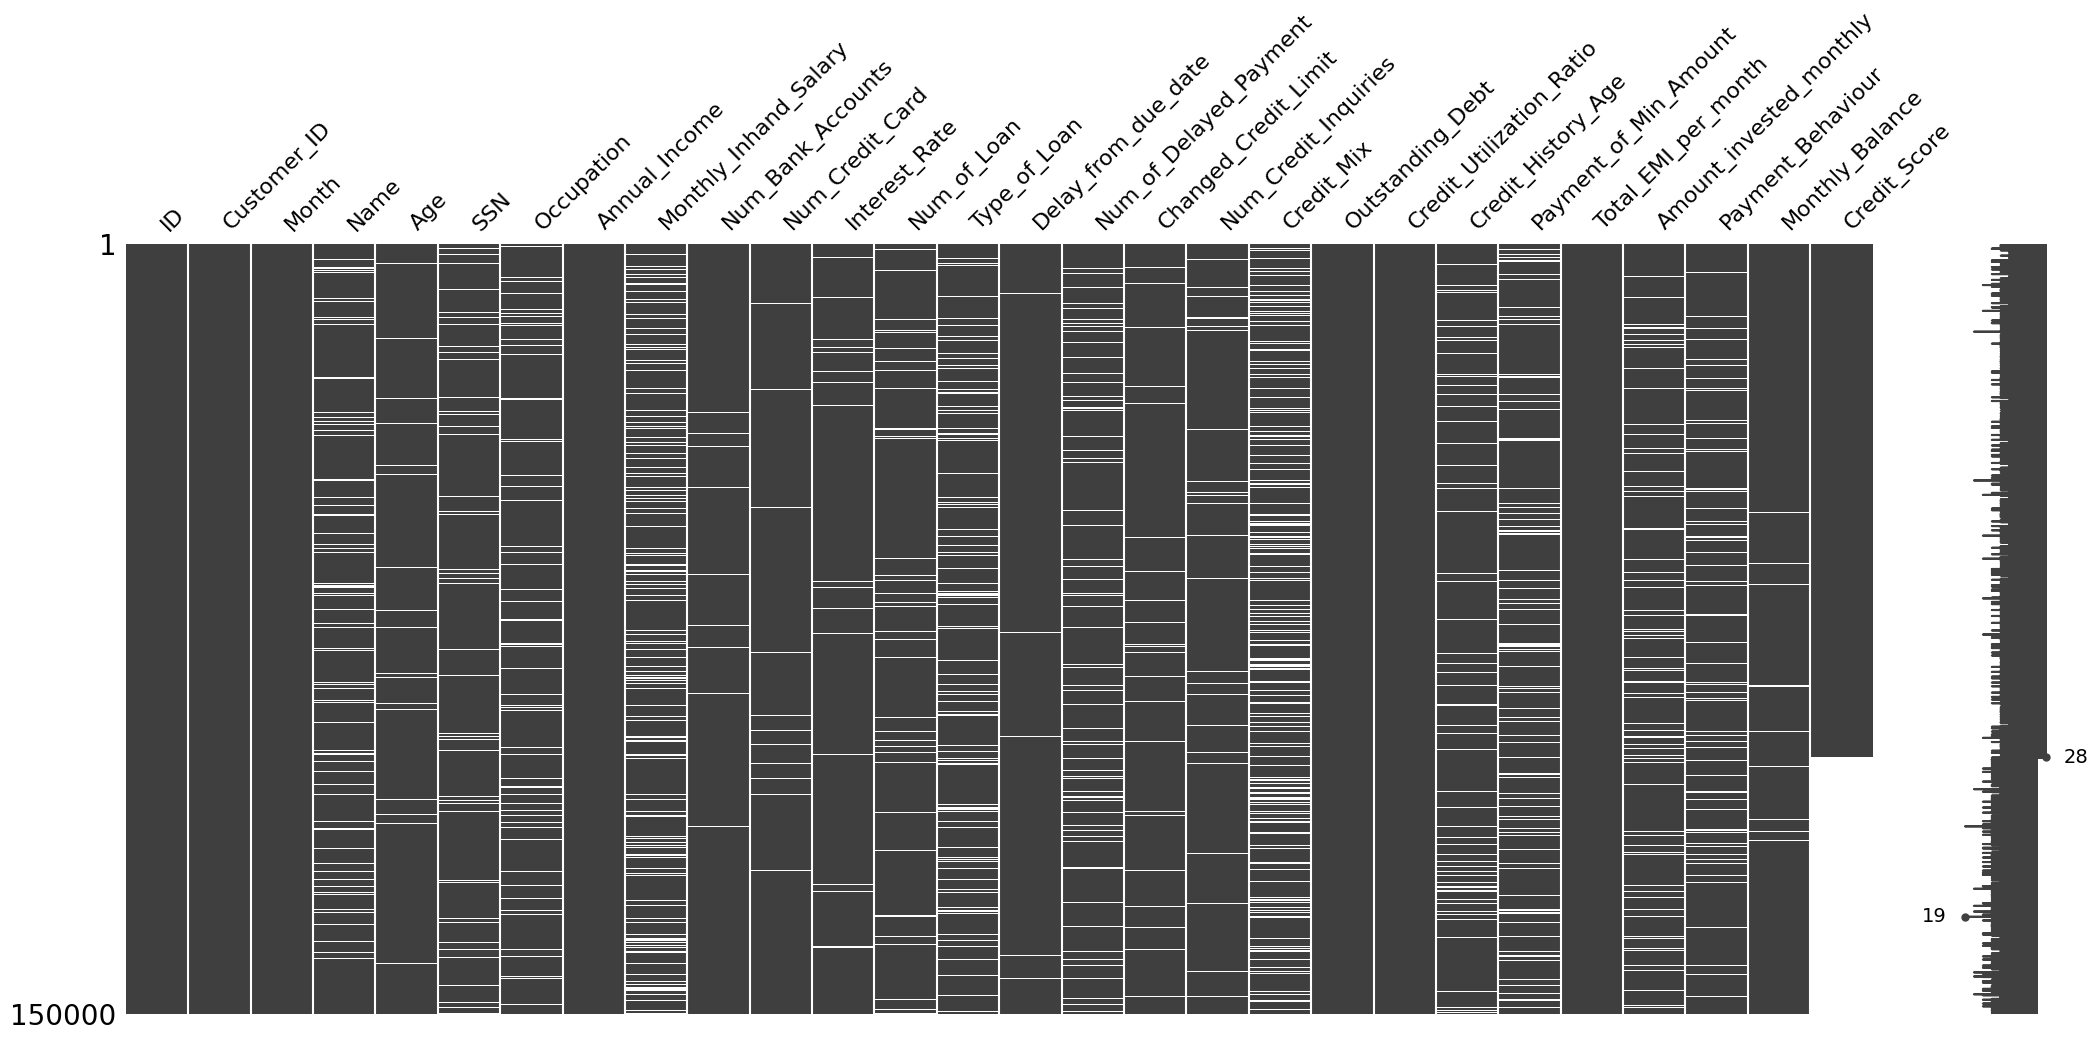

In [ ]:
# Визуализация полноты данных (пустые значения в Credit_Score - это значения из тестового датасета)
missingno.matrix(main_full_clean)
# Очевидно, что удаление строк с пропущенными значениями целиком не подойдет в данной ситуации (пропуски - скорее в шахматном порядке, относительно, по крайней мере, соседних колонок)

In [ ]:
# устранение пропусков
main_full_compl = main_full_clean.copy()

In [ ]:
# для Age принято решение использовать среднее значение, т.к. в течение года у заемщика может быть 2 значения возраста, и использовать моду - менее корректно
print(main_full_compl.groupby(['Customer_ID'])['Age'].mean())
print(main_full_compl.groupby(['Customer_ID'])['Age'].agg(pd.Series.mode))

Customer_ID
CUS_0x1000    17.583333
CUS_0x1009    25.833333
CUS_0x100b    18.666667
CUS_0x1011    43.916667
CUS_0x1013    43.833333
                ...    
CUS_0xff3     55.181818
CUS_0xff4     36.909091
CUS_0xff6         18.75
CUS_0xffc     17.583333
CUS_0xffd          29.5
Name: Age, Length: 12500, dtype: Float64
Customer_ID
CUS_0x1000          18
CUS_0x1009          26
CUS_0x100b          19
CUS_0x1011          44
CUS_0x1013          44
                ...   
CUS_0xff3           55
CUS_0xff4           37
CUS_0xff6           19
CUS_0xffc           18
CUS_0xffd     [29, 30]
Name: Age, Length: 12500, dtype: object


In [ ]:
main_full_compl.Age = main_full_compl.Age.astype('Float32')
main_full_compl['Age'] = main_full_compl['Age'].fillna(main_full_compl.groupby(['Customer_ID'])['Age'].transform('mean'))

In [ ]:
print(main_full_compl.groupby(['Customer_ID'])['Occupation'].agg(pd.Series.mode))

Customer_ID
CUS_0x1000           Lawyer
CUS_0x1009         Mechanic
CUS_0x100b    Media_Manager
CUS_0x1011           Doctor
CUS_0x1013         Mechanic
                  ...      
CUS_0xff3         Scientist
CUS_0xff4      Entrepreneur
CUS_0xff6            Doctor
CUS_0xffc          Musician
CUS_0xffd         Scientist
Name: Occupation, Length: 12500, dtype: object


In [ ]:
# пропуски в Occupation заполнены модой
main_full_compl['Occupation'] = main_full_compl['Occupation'].fillna(main_full_compl.groupby(['Customer_ID'])['Occupation'].transform(lambda x: x.mode()[0]))

In [ ]:
# пропуски в Monthly_Inhand_Salary заполнены медианой
main_full_compl['Monthly_Inhand_Salary'] = main_full_compl['Monthly_Inhand_Salary'].fillna(main_full_compl.groupby(['Customer_ID'])['Monthly_Inhand_Salary'].transform('median'))

In [ ]:
# пропуски в Num_Bank_Accounts проще заменить медианой
print(main_full_compl.groupby(['Customer_ID'])['Num_Bank_Accounts'].median().astype('Int16'))

Customer_ID
CUS_0x1000    6
CUS_0x1009    6
CUS_0x100b    1
CUS_0x1011    3
CUS_0x1013    3
             ..
CUS_0xff3     0
CUS_0xff4     8
CUS_0xff6     5
CUS_0xffc     6
CUS_0xffd     8
Name: Num_Bank_Accounts, Length: 12500, dtype: Int16


In [ ]:
main_full_compl['Num_Bank_Accounts'] = main_full_compl['Num_Bank_Accounts'].fillna(main_full_compl.groupby(['Customer_ID'])['Num_Bank_Accounts'].transform('median'))

In [ ]:
main_full_compl.Num_Bank_Accounts = main_full_compl.Num_Bank_Accounts.astype('Int16')

In [ ]:
# пропуски в Num_Credit_Card модой
main_full_compl['Num_Credit_Card'] = main_full_compl['Num_Credit_Card'].fillna(main_full_compl.groupby(['Customer_ID'])['Num_Credit_Card'].transform(lambda x: x.mode()[0]))

In [ ]:
main_full_compl.Num_Credit_Card = main_full_compl.Num_Credit_Card.astype('Int16')

In [ ]:
# пропуски в Interest_Rate модой

In [ ]:
main_full_compl['Interest_Rate'] = main_full_compl['Interest_Rate'].fillna(main_full_compl.groupby(['Customer_ID'])['Interest_Rate'].transform(lambda x: x.mode()[0]))

In [ ]:
main_full_compl.Interest_Rate = main_full_compl.Interest_Rate.astype('Int16')

In [ ]:
# пропуски в Num_of_Loan модой
main_full_compl['Num_of_Loan'] = main_full_compl['Num_of_Loan'].fillna(main_full_compl.groupby(['Customer_ID'])['Num_of_Loan'].transform(lambda x: x.mode()[0]))

In [ ]:
main_full_compl.Num_of_Loan = main_full_compl.Num_of_Loan.astype('Int16')

In [ ]:
# пропуски в Delay_from_due_date медианой
main_full_compl['Delay_from_due_date'] = main_full_compl['Delay_from_due_date'].fillna(main_full_compl.groupby(['Customer_ID'])['Delay_from_due_date'].transform('median'))

In [ ]:
# пропуски в Num_of_Delayed_Payment модой
main_full_compl['Num_of_Delayed_Payment'] = main_full_compl['Num_of_Delayed_Payment'].fillna(main_full_compl.groupby(['Customer_ID'])['Num_of_Delayed_Payment'].transform(lambda x: x.mode()[0]))

In [ ]:
main_full_compl.Num_of_Delayed_Payment = main_full_compl.Num_of_Delayed_Payment.astype('Int16')

In [ ]:
# пропуски в Changed_Credit_Limit медианой
main_full_compl['Changed_Credit_Limit'] = main_full_compl['Changed_Credit_Limit'].fillna(main_full_compl.groupby(['Customer_ID'])['Changed_Credit_Limit'].transform('median'))

In [ ]:
# пропуски в Num_Credit_Inquiries модой
main_full_compl['Num_Credit_Inquiries'] = main_full_compl['Num_Credit_Inquiries'].fillna(main_full_compl.groupby(['Customer_ID'])['Num_Credit_Inquiries'].transform(lambda x: x.mode()[0]))

In [ ]:
main_full_compl.Num_Credit_Inquiries = main_full_compl.Num_Credit_Inquiries.astype('Int16')

In [ ]:
# пропуски в Credit_History_Age медианой
main_full_compl.Credit_History_Age = main_full_compl.Credit_History_Age.astype('Float32')
main_full_compl['Credit_History_Age'] = main_full_compl['Credit_History_Age'].fillna(main_full_compl.groupby(['Customer_ID'])['Credit_History_Age'].transform('median'))

In [ ]:
# пропуски в Amount_invested_monthly медианой
main_full_compl['Amount_invested_monthly'] = main_full_compl['Amount_invested_monthly'].fillna(main_full_compl.groupby(['Customer_ID'])['Amount_invested_monthly'].transform('median'))

In [ ]:
# пропуски в Payment_Behaviour модой
main_full_compl['Payment_Behaviour'] = main_full_compl['Payment_Behaviour'].fillna(main_full_compl.groupby(['Customer_ID'])['Payment_Behaviour'].transform(lambda x: x.mode()[0]))

In [ ]:
# пропуски в Monthly_Balance медианой
main_full_compl['Monthly_Balance'] = main_full_compl['Monthly_Balance'].fillna(main_full_compl.groupby(['Customer_ID'])['Monthly_Balance'].transform('median'))

In [ ]:
# сравнение статистик до и после заполнения пропусков
main_full_clean.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,145816.0,150000.0,127500.0,148013.0,146550.0,147000.0,143420.0,149111.0,138569.0,146833.0,144504.0,150000.0,150000.0,136500.0,150000.0,136770.0,148223.0
mean,33.487882,173055.208107,4190.104345,5.36915,5.533095,14.531585,3.534319,21.20252,31.130852,10.385765,6.283086,1426.220373,32.283307,223.215326,1432.5136,195.305286,402.722924
std,10.772032,1404214.625,3180.489656,2.592672,2.069293,8.741031,2.446927,14.794127,225.27108,6.785539,3.956196,1155.127075,5.113316,99.719548,8403.759766,198.599612,213.844776
min,14.0,7005.930176,303.645416,0.0,0.0,1.0,0.0,0.0,0.0,-6.49,0.0,0.23,20.0,1.0,0.0,0.0,0.00776
25%,25.0,19455.490234,1625.265869,3.0,4.0,7.0,2.0,10.0,9.0,5.34,3.0,566.07251,28.05473,146.0,30.947775,72.232193,270.241882
50%,33.0,37578.609375,3091.0,5.0,5.0,13.0,3.0,18.0,14.0,9.41,6.0,1166.154968,32.297058,222.0,71.280006,128.984787,336.815857
75%,42.0,72796.90625,5948.45459,7.0,7.0,20.0,5.0,28.0,18.0,14.84,9.0,1945.962555,36.487954,304.0,166.279556,236.844299,470.477905
max,56.0,24198062.0,15204.633789,11.0,11.0,34.0,9.0,67.0,4399.0,36.970001,17.0,4998.069824,50.0,408.0,82398.0,1977.32605,1606.518188


In [ ]:
# статистики практически не изменились
main_full_compl.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,150000.0,150000.0,150000.0,150000.0,150000.0,150000.0,150000.0,150000.0,150000.0,150000.0,150000.0,150000.0,150000.0,150000.0,150000.0,150000.0,150000.0
mean,33.479297,173055.208107,4192.647253,5.368953,5.53366,14.53208,3.53288,21.085247,29.693987,10.386985,6.27894,1426.220373,32.283307,223.206933,1432.5136,193.014347,403.5996
std,10.766942,1404214.625,3182.841064,2.59383,2.068672,8.741316,2.446352,14.828543,216.583484,6.781032,3.957925,1155.127075,5.113316,99.709343,8403.759766,193.079681,214.183884
min,14.0,7005.930176,303.645416,0.0,0.0,1.0,0.0,0.0,0.0,-6.49,0.0,0.23,20.0,1.0,0.0,0.0,0.00776
25%,25.0,19455.490234,1625.55835,3.0,4.0,7.0,2.0,10.0,9.0,5.34,3.0,566.07251,28.05473,146.0,30.947775,73.932465,270.46167
50%,33.0,37578.609375,3091.0,5.0,5.0,13.0,3.0,18.0,14.0,9.4,6.0,1166.154968,32.297058,221.5,71.280006,129.392479,337.426529
75%,42.0,72796.90625,5951.373535,7.0,7.0,20.0,5.0,28.0,18.0,14.83,9.0,1945.962555,36.487954,304.0,166.279556,234.245045,472.138435
max,56.0,24198062.0,15204.633789,11.0,11.0,34.0,9.0,67.0,4399.0,36.970001,17.0,4998.069824,50.0,408.0,82398.0,1977.32605,1606.518188


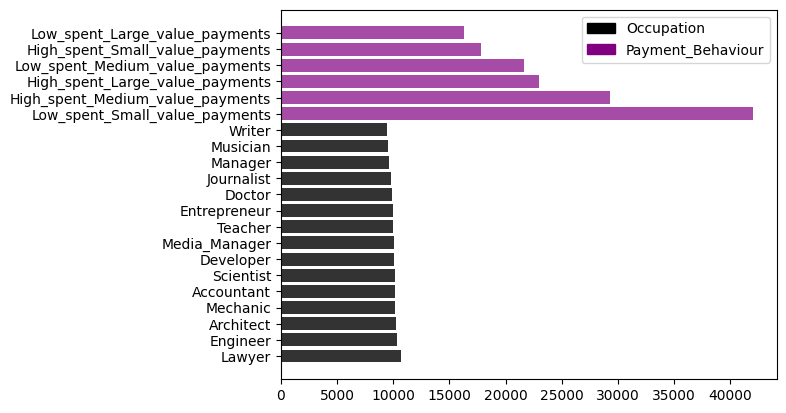

In [ ]:
# распределение в категориальных признаках (которые будут использоваться далее) после устранения пропусков
cat_counts11 = main_full_compl['Occupation'].value_counts()
cat_counts44 = main_full_compl['Payment_Behaviour'].value_counts()

plt.barh(cat_counts11.index, cat_counts11.values, color = 'black', alpha = 0.8)
plt.barh(cat_counts44.index, cat_counts44.values, color = 'purple', alpha = 0.7)

plt.legend(handles=[bk_patch, pp_patch])

In [ ]:
correl = main_full_compl.select_dtypes(exclude = 'category').corr()

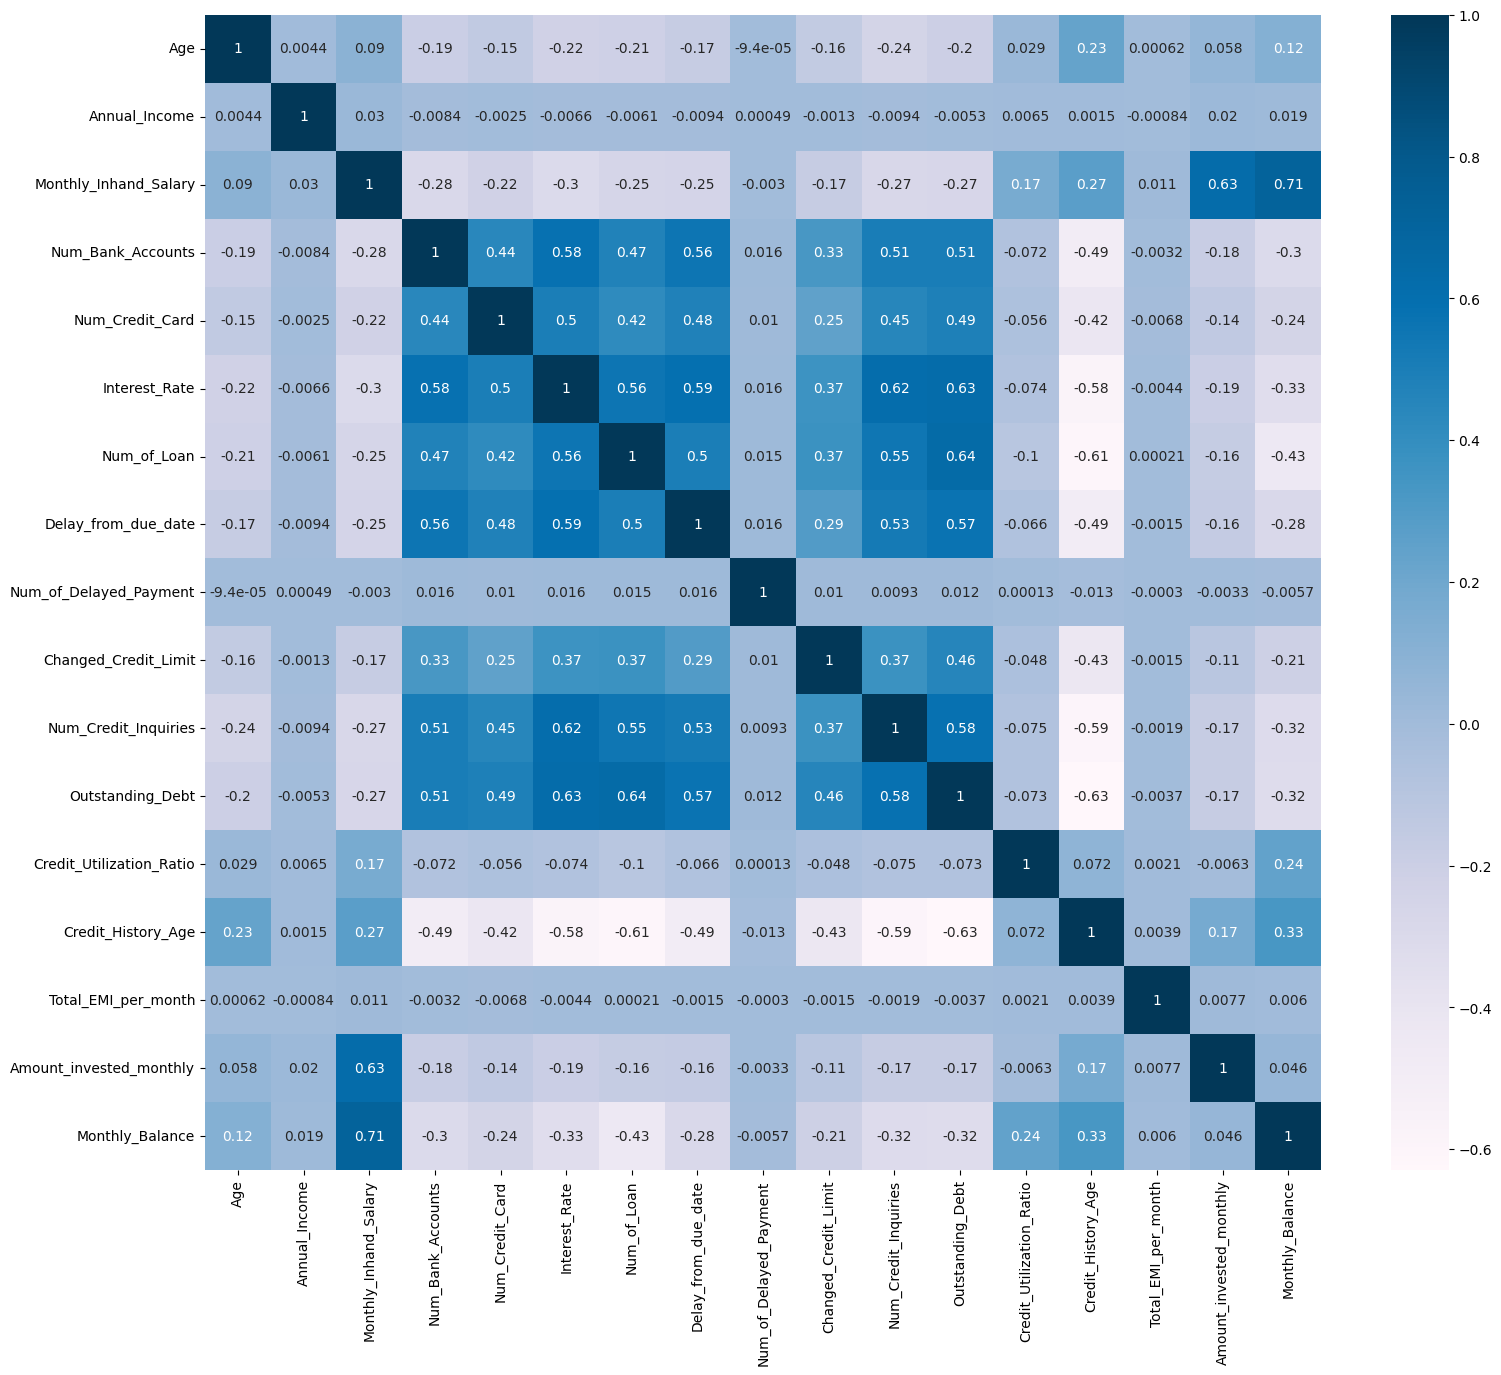

In [ ]:
plt.figure(figsize = (18, 15))
hm = sns.heatmap(
        data = correl,
        annot = True,
        cmap = 'PuBu'
    )
# пока нельзя сказать, что какие-то признаки сильно коррелируют, возможно, это будет явнее после дальнейших преобразований. Но пока можно уже выделить Monthly_Inhand_Salary и Monthly_Balance

<Axes: xlabel='Monthly_Balance', ylabel='Monthly_Inhand_Salary'>

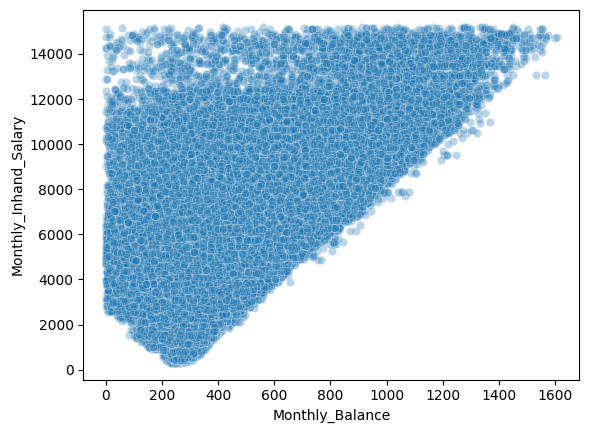

In [ ]:
sns.scatterplot(data = main_full_compl, x = 'Monthly_Balance', y = 'Monthly_Inhand_Salary', alpha = 0.3)

# Подготовка данных для машинного обучения

 Вернемся к выбросам. Там, где выбросы считаются ошибкой - значение будет заменено медианой. А там где есть слишком длинные "хвосты" в распределении (или сомнения в ошибке) - значения в конце "хвоста" будет приравнено ближайшей границе нужного диапазона.
 Подозрение на выбросы-ошибки, явные выбросы или распределение с длинным "хвостом" есть в колонках Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Amount_invested_monthly, Monthly_Balance,
Total_EMI_per_month и Annual_Income.

In [ ]:
# посмотрим на диапазоны выбросов и далее заменим такой диапазон на медиану (или на ближайшую границу диапазона)
q1 = main_full_compl['Delay_from_due_date'].quantile(0.25)
q3 = main_full_compl['Delay_from_due_date'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.99 * iqr)
main_full_compl[~main_full_compl['Delay_from_due_date'].between(lower_bound, upper_bound, inclusive='both')].T

,418,422,477,585,682,1285,1286,1698,1928,2025,...,142472,142612,142613,143597,144923,146428,147196,147198,148439,149585
ID,0x1874,0x1878,0x18cb,0x196f,0x1a00,0x1d87,0x1d88,0x1ff4,0x214e,0x21df,...,0x207c2,0x20966,0x20967,0x214ef,0x22475,0x2361e,0x23f1e,0x23f20,0x24da9,0x25b1b
Customer_ID,CUS_0xbe1b,CUS_0xbe1b,CUS_0x8f17,CUS_0x384c,CUS_0x1e70,CUS_0xa548,CUS_0xa548,CUS_0x3ef5,CUS_0x709d,CUS_0x41b7,...,CUS_0x21a1,CUS_0x24b9,CUS_0x24b9,CUS_0xa1ab,CUS_0x7a6c,CUS_0x5fc9,CUS_0xb832,CUS_0xb832,CUS_0x1837,CUS_0xa93b
Month,March,July,June,February,March,June,July,March,January,February,...,September,September,October,October,December,September,September,November,December,October
Name,NaN,Kazunorit,Ermans,David Henryp,Alexh,Costa Alisterq,Costa Alisterq,Robinsonl,Palmers,Laurens,...,Jessica Toonkelg,Dianeh,Dianeh,Langen,Jessica Wohlp,NaN,Smithb,Smithb,Kazunori Takadab,Herbert Lashf
Age,44.0,44.0,46.0,41.0,17.0,16.0,16.0,32.0,40.0,25.0,...,18.0,36.0,35.909092,35.0,32.0,35.0,24.0,24.0,36.0,42.0
SSN,853-17-1579,853-17-1579,794-17-4490,813-91-8749,772-58-9547,064-39-6784,064-39-6784,259-09-9023,042-91-6695,891-76-2011,...,452-67-4543,586-17-0375,586-17-0375,399-75-1500,492-59-4587,575-83-5232,979-80-0123,NaN,600-87-2067,831-44-6626
Occupation,Developer,Developer,Journalist,Scientist,Manager,Mechanic,Mechanic,Doctor,Lawyer,Teacher,...,Mechanic,Writer,Writer,Lawyer,Writer,Teacher,Scientist,Scientist,Musician,Media_Manager
Annual_Income,14129.759766,14129.759766,41746.761719,9841.339844,14841.349609,35161.460938,35161.460938,7821.240234,9141.629883,7612.725098,...,20326.869141,49228.351562,49228.351562,40561.199219,29265.300781,16444.419922,14125.669922,14125.669922,34180.941406,59597.839844
Monthly_Inhand_Salary,1012.47998,1017.848755,3651.896729,690.111694,1437.779175,2930.121582,2930.121582,468.769989,797.80249,928.393738,...,1396.905884,4210.362305,4210.362305,3616.100098,2410.774902,1411.368286,1173.13916,1173.13916,2685.411621,5173.486816
Num_Bank_Accounts,8,8,8,8,6,10,10,8,9,8,...,9,9,9,9,9,7,10,10,6,7


In [ ]:
upper_bound

63.82

In [ ]:
# Выбросы заменены на медиану
main_full_compl.loc[(main_full_compl['Delay_from_due_date'] > 64), 'Delay_from_due_date'] = main_full_compl.Delay_from_due_date.median()

In [ ]:
q1 = main_full_compl['Num_of_Delayed_Payment'].quantile(0.25)
q3 = main_full_compl['Num_of_Delayed_Payment'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
main_full_compl[~main_full_compl['Num_of_Delayed_Payment'].between(lower_bound, upper_bound, inclusive='both')].T

,252,284,304,409,643,706,807,1032,1212,1303,...,148617,148906,148975,149328,149385,149475,149635,149738,149772,149838
ID,0x177a,0x17aa,0x17ca,0x1867,0x19c5,0x1a24,0x1ab9,0x1c0e,0x1d1a,0x1da1,...,0x24fc3,0x25324,0x253f1,0x2581a,0x258c3,0x259cd,0x25bad,0x25ce4,0x25d4e,0x25e10
Customer_ID,CUS_0x6048,CUS_0x9b94,CUS_0x42ac,CUS_0xb986,CUS_0x78e0,CUS_0x4af0,CUS_0x7250,CUS_0x2947,CUS_0x2584,CUS_0x54c0,...,CUS_0x78f,CUS_0x73bb,CUS_0xa1c5,CUS_0x6120,CUS_0x29f5,CUS_0x9efc,CUS_0xa66c,CUS_0x1956,CUS_0x2637,CUS_0xbd8f
Month,May,May,January,February,April,March,August,January,May,August,...,October,November,December,September,October,December,December,November,September,November
Name,Ayeshaz,Bri,Lawrencea,Simon Jessope,Tagarish,Nicolacih,Doris Frankelj,Carolinew,Steven C.z,Hollx,...,rian Ellsworthm,Nadia Damouniw,Baker Sineadf,Erinf,Sarahq,Xiaoyi Shaoa,Ernest Scheyderi,Shalal-Esay,Diane Bartzj,Amena Bakrb
Age,43.0,36.0,36.0,14.0,47.0,18.0,37.0,47.0,31.0,23.0,...,43.0,21.0,21.0,29.0,36.0,28.0,24.0,34.545456,28.0,32.0
SSN,425-47-6723,734-54-7098,700-60-3660,180-88-7800,352-67-4436,397-45-5329,651-67-7536,742-36-4668,NaN,934-98-5531,...,351-75-3508,594-65-2540,117-69-4832,191-14-8400,039-46-6036,168-85-8251,770-36-8261,467-02-8044,272-33-1370,344-21-3701
Occupation,Musician,Manager,Musician,Developer,Accountant,Developer,Teacher,Accountant,Accountant,Entrepreneur,...,Entrepreneur,Accountant,Media_Manager,Journalist,Developer,Accountant,Accountant,Doctor,Writer,Lawyer
Annual_Income,18627.640625,71681.398438,15566.019531,39887.21875,17787.339844,27070.070312,85328.726562,37071.199219,59971.421875,19283.470703,...,12804.964844,70074.0,22049.234375,59207.558594,101316.640625,33418.550781,74349.179688,15666.495117,29090.5,107911.601562
Monthly_Inhand_Salary,1387.303345,5799.450195,1423.168335,3224.935059,1242.27832,2518.839111,6858.727539,3006.266602,5190.618164,1886.955811,...,771.080444,6105.5,1764.436279,5176.963379,8526.053711,2739.87915,6133.765137,1342.54126,2472.208252,8491.808594
Num_Bank_Accounts,7,3,8,9,8,7,3,1,8,10,...,3,3,4,6,3,6,0,4,5,3


In [ ]:
upper_bound

31.5

In [ ]:
# Выбросы заменены на ближайшую границу, т. к. большинство из них могут оказаться не ошибками, а исключениями по смыслу параметра
main_full_compl.loc[(main_full_compl['Num_of_Delayed_Payment'] > 32), 'Num_of_Delayed_Payment'] = 32

In [ ]:
q1 = main_full_compl['Changed_Credit_Limit'].quantile(0.25)
q3 = main_full_compl['Changed_Credit_Limit'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
main_full_compl[~main_full_compl['Changed_Credit_Limit'].between(lower_bound, upper_bound, inclusive='both')].T

,584,585,586,587,588,589,590,591,633,682,...,149308,149309,149310,149311,149584,149585,149586,149587,149878,149903
ID,0x196e,0x196f,0x1970,0x1971,0x1972,0x1973,0x1974,0x1975,0x19b7,0x1a00,...,0x257de,0x257df,0x257e0,0x257e1,0x25b1a,0x25b1b,0x25b1c,0x25b1d,0x25e88,0x25ed1
Customer_ID,CUS_0x384c,CUS_0x384c,CUS_0x384c,CUS_0x384c,CUS_0x384c,CUS_0x384c,CUS_0x384c,CUS_0x384c,CUS_0x700d,CUS_0x1e70,...,CUS_0xc195,CUS_0xc195,CUS_0xc195,CUS_0xc195,CUS_0xa93b,CUS_0xa93b,CUS_0xa93b,CUS_0xa93b,CUS_0x4a8f,CUS_0x1232
Month,January,February,March,April,May,June,July,August,February,March,...,September,October,November,December,September,October,November,December,November,December
Name,David Henryp,David Henryp,David Henryp,NaN,David Henryp,David Henryp,David Henryp,David Henryp,Blenkinsopc,Alexh,...,Laurenceq,Laurenceq,NaN,Laurenceq,Herbert Lashf,Herbert Lashf,Herbert Lashf,Herbert Lashf,Doris Frankelm,NaN
Age,41.0,41.0,41.0,42.0,42.0,42.0,42.0,42.0,21.0,17.0,...,24.0,25.0,25.0,25.0,42.0,42.0,42.0,42.0,24.0,17.0
SSN,813-91-8749,813-91-8749,813-91-8749,813-91-8749,813-91-8749,813-91-8749,813-91-8749,813-91-8749,992-49-2793,772-58-9547,...,939-96-0773,939-96-0773,939-96-0773,939-96-0773,831-44-6626,831-44-6626,831-44-6626,831-44-6626,021-30-1201,441-26-1297
Occupation,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Accountant,Manager,...,Mechanic,Mechanic,Mechanic,Mechanic,Media_Manager,Media_Manager,Media_Manager,Media_Manager,Engineer,Developer
Annual_Income,9841.339844,9841.339844,9841.339844,9841.339844,9841.339844,9841.339844,9841.339844,9841.339844,44719.171875,14841.349609,...,81842.523438,81842.523438,81842.523438,81842.523438,59597.839844,59597.839844,59597.839844,59597.839844,34493.921875,14937.490234
Monthly_Inhand_Salary,690.111694,690.111694,690.111694,690.111694,690.111694,690.111694,690.111694,690.111694,3969.597412,1437.779175,...,6733.209961,6733.209961,6733.209961,6733.209961,5173.486816,5173.486816,5173.486816,5173.486816,3043.493408,1142.790894
Num_Bank_Accounts,8,8,8,8,8,8,8,8,6,6,...,6,6,6,6,7,7,7,7,9,8


In [ ]:
upper_bound

29.0649995803833

In [ ]:
# Выбросы заменены на ближайшую границу, т. к. большинство из них могут оказаться НЕ ошибками
main_full_compl.loc[(main_full_compl['Changed_Credit_Limit'] > 29.1), 'Changed_Credit_Limit'] = 29.1

In [ ]:
q1 = main_full_compl['Amount_invested_monthly'].quantile(0.25)
q3 = main_full_compl['Amount_invested_monthly'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (6 * iqr)
upper_bound = q3 + (6 * iqr)
main_full_compl[~main_full_compl['Amount_invested_monthly'].between(lower_bound, upper_bound, inclusive='both')].T

,778,1576,1733,1735,1974,2043,2354,2358,2376,2383,...,147995,148216,149047,149128,149244,149335,149464,149466,149835,149937
ID,0x1a90,0x1f3e,0x2027,0x2029,0x2190,0x21f9,0x23cc,0x23d0,0x23ee,0x23f5,...,0x24875,0x24b12,0x254c9,0x255c2,0x2571e,0x25829,0x259b2,0x259b4,0x25e05,0x25f3b
Customer_ID,CUS_0x62c6,CUS_0x8a4b,CUS_0x2c31,CUS_0x2c31,CUS_0x8c9a,CUS_0xa05f,CUS_0x9167,CUS_0x9167,CUS_0x4883,CUS_0x4883,...,CUS_0x194b,CUS_0xbe2,CUS_0x4a02,CUS_0x7dc5,CUS_0x6e9,CUS_0x797a,CUS_0x1f97,CUS_0x1f97,CUS_0xb09,CUS_0x3855
Month,March,January,June,August,July,April,March,July,January,August,...,December,September,December,September,September,December,September,November,December,October
Name,B.u,NaN,NaN,Yokog,Caroline Valetkevitchr,Zhdannikovi,Henryh,Henryh,Clareb,Clareb,...,Liza Dobkinan,Robin Pomeroyc,Chuck Mikolajczaky,Petersonr,eny,Wohlh,Hitoshio,Hitoshio,Lianau,Xolai
Age,20.0,51.0,30.0,30.0,32.0,21.0,21.0,22.0,23.0,23.0,...,30.0,45.0,33.0,33.0,44.0,19.0,50.0,50.0,31.0,28.0
SSN,860-36-1556,142-99-2481,680-06-0631,680-06-0631,759-79-5662,276-54-6995,033-47-7890,033-47-7890,822-72-2207,822-72-2207,...,661-41-7229,035-96-8957,426-22-0154,994-58-4239,750-50-1814,303-89-6328,346-14-6418,346-14-6418,228-47-4867,NaN
Occupation,Writer,Doctor,Musician,Musician,Architect,Scientist,Entrepreneur,Entrepreneur,Entrepreneur,Entrepreneur,...,Engineer,Architect,Scientist,Architect,Mechanic,Media_Manager,Journalist,Journalist,Lawyer,Scientist
Annual_Income,144881.6875,110786.640625,173196.3125,173196.3125,118172.640625,125508.359375,177150.40625,177150.40625,151722.5625,151722.5625,...,161272.046875,171613.59375,160728.046875,175572.4375,174552.84375,160016.4375,175718.640625,175718.640625,146310.6875,118677.539062
Monthly_Inhand_Salary,11877.473633,9299.219727,14258.026367,14258.026367,9449.416016,10559.030273,14710.533203,14710.533203,12352.546875,12352.546875,...,13312.336914,14154.133789,13469.00293,14422.037109,14581.070312,13477.703125,14707.219727,14707.219727,12124.556641,9963.794922
Num_Bank_Accounts,3,4,4,4,0,2,2,2,5,5,...,1,5,2,5,4,2,3,3,5,4


In [ ]:
upper_bound

1196.1205253601074

In [ ]:
# Выбросы заменены на ближайшую границу в связи с видом распределения
main_full_compl.loc[(main_full_compl['Amount_invested_monthly'] > 1196), 'Amount_invested_monthly'] = 1196

In [ ]:
q1 = main_full_compl['Monthly_Balance'].quantile(0.25)
q3 = main_full_compl['Monthly_Balance'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (3 * iqr)
upper_bound = q3 + (3.8 * iqr)
main_full_compl[~main_full_compl['Monthly_Balance'].between(lower_bound, upper_bound, inclusive='both')].T

,1730,1731,2544,2546,2547,2784,2928,2930,2932,2933,...,148081,148083,148216,148217,148893,149339,149465,149758,149759,149809
ID,0x2024,0x2025,0x24ea,0x24ec,0x24ed,0x2652,0x272a,0x272c,0x272e,0x272f,...,0x2497b,0x2497d,0x24b12,0x24b13,0x252ff,0x25835,0x259b3,0x25d20,0x25d21,0x25dbb
Customer_ID,CUS_0x2c31,CUS_0x2c31,CUS_0x56d1,CUS_0x56d1,CUS_0x56d1,CUS_0x51e,CUS_0x6065,CUS_0x6065,CUS_0x6065,CUS_0x6065,...,CUS_0x33b0,CUS_0x33b0,CUS_0xbe2,CUS_0xbe2,CUS_0x3325,CUS_0x1130,CUS_0x1f97,CUS_0x10f9,CUS_0x10f9,CUS_0xae66
Month,March,April,January,March,April,January,January,March,May,June,...,October,December,September,October,October,December,October,November,December,October
Name,Yokog,Yokog,Bena,Bena,NaN,Edwardsi,Cremerp,Cremerp,Cremerp,Cremerp,...,Daniel Trottas,Daniel Trottas,Robin Pomeroyc,Robin Pomeroyc,Catherine Bremerl,Elizabethr,Hitoshio,Gilles Guillaumev,Gilles Guillaumev,Jino
Age,30.0,30.0,27.0,27.0,27.0,42.0,35.0,36.0,36.0,36.0,...,42.0,43.0,45.0,45.0,19.0,37.0,50.0,54.0,54.0,31.0
SSN,680-06-0631,680-06-0631,203-76-0108,203-76-0108,203-76-0108,946-94-7531,332-11-5896,332-11-5896,NaN,332-11-5896,...,406-00-8686,406-00-8686,035-96-8957,035-96-8957,NaN,846-60-3664,346-14-6418,746-79-6875,746-79-6875,721-45-4479
Occupation,Musician,Musician,Writer,Writer,Writer,Developer,Accountant,Accountant,Accountant,Accountant,...,Doctor,Doctor,Architect,Architect,Accountant,Journalist,Journalist,Lawyer,Lawyer,Writer
Annual_Income,173196.3125,173196.3125,162550.3125,162550.3125,162550.3125,132414.15625,174304.046875,174304.046875,174304.046875,174304.046875,...,179317.046875,9218419.0,171613.59375,171613.59375,173303.6875,137798.875,175718.640625,150131.6875,150131.6875,142560.359375
Monthly_Inhand_Salary,14258.026367,14258.026367,13731.860352,13731.860352,13731.860352,11050.513672,14458.336914,14458.336914,14458.336914,14458.336914,...,15091.086914,14100.762695,14154.133789,14154.133789,14681.973633,10609.791992,14707.219727,11102.135742,12596.973633,11773.030273
Num_Bank_Accounts,4,4,0,0,0,3,1,1,1,1,...,0,0,5,5,1,6,3,5,5,6


In [ ]:
upper_bound

1238.5101440429687

In [ ]:
# Выбросы заменены на ближайшую границу в связи с видом распределения
main_full_compl.loc[(main_full_compl['Monthly_Balance'] > 1238), 'Monthly_Balance'] = 1238

In [ ]:
q1 = main_full_compl['Total_EMI_per_month'].quantile(0.25)
q3 = main_full_compl['Total_EMI_per_month'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (3 * iqr)
upper_bound = q3 + (8 * iqr)
main_full_compl[~main_full_compl['Total_EMI_per_month'].between(lower_bound, upper_bound, inclusive='both')].T

,40,45,51,52,76,94,158,187,241,246,...,149757,149758,149759,149799,149809,149845,149852,149930,149963,149991
ID,0x163e,0x1643,0x164d,0x164e,0x1672,0x168c,0x16ec,0x1719,0x176b,0x1770,...,0x25d1f,0x25d20,0x25d21,0x25d99,0x25dbb,0x25e27,0x25e3e,0x25f24,0x25f85,0x25fd9
Customer_ID,CUS_0x95ee,CUS_0x95ee,CUS_0x284a,CUS_0x284a,CUS_0xba08,CUS_0xc0ab,CUS_0x4100,CUS_0x5b48,CUS_0x9a71,CUS_0x9a71,...,CUS_0x10f9,CUS_0x10f9,CUS_0x10f9,CUS_0x94de,CUS_0xae66,CUS_0x1132,CUS_0xc394,CUS_0x1285,CUS_0x2654,CUS_0xaf61
Month,January,June,April,May,May,July,July,April,February,July,...,October,November,December,December,October,October,September,November,December,December
Name,Np,Np,Nadiaq,Nadiaq,Jamesj,Soyoungd,Reema,NaN,NaN,Mukhopadhyayc,...,Gilles Guillaumev,Gilles Guillaumev,Gilles Guillaumev,Chuckw,Jino,Jonathano,N.o,Lauriay,enj,Chris Wickhamm
Age,31.0,31.0,34.0,34.0,44.0,33.0,32.0,32.0,54.0,55.0,...,54.0,54.0,54.0,37.0,31.0,39.200001,34.0,44.0,38.0,50.0
SSN,612-70-8987,612-70-8987,NaN,411-51-0676,366-68-1681,342-90-2649,068-83-4394,706-95-0150,889-07-2357,889-07-2357,...,746-79-6875,746-79-6875,746-79-6875,349-98-3586,721-45-4479,152-95-7926,747-43-9082,540-18-1115,647-67-8889,133-16-7738
Occupation,Lawyer,Lawyer,Lawyer,Lawyer,Journalist,Engineer,Entrepreneur,Lawyer,Scientist,Scientist,...,Lawyer,Lawyer,Lawyer,Writer,Writer,Mechanic,Architect,Architect,Media_Manager,Writer
Annual_Income,73928.460938,73928.460938,131313.40625,131313.40625,31370.800781,88640.242188,19300.339844,12600.445312,20186.019531,20186.019531,...,150131.6875,150131.6875,150131.6875,61167.898438,142560.359375,46268.398438,108484.382812,10692.160156,139664.953125,37188.101562
Monthly_Inhand_Salary,5988.705078,5988.705078,10469.208008,10469.208008,2825.233398,7266.686523,1512.361694,782.037109,1684.168335,1684.168335,...,11102.135742,11102.135742,12596.973633,4912.325195,11773.030273,3983.699951,8820.365234,817.013306,10699.849609,3097.008301
Num_Bank_Accounts,4,4,0,0,1,3,6,5,1,1,...,5,5,5,3,6,5,4,8,3,1


In [ ]:
upper_bound

1248.9338073730469

In [ ]:
# Выбросы заменены на ближайшую границу в связи с видом распределения. Граница сравнивалась с границами распределений значений других колонок.
main_full_compl.loc[(main_full_compl['Total_EMI_per_month'] > 1248.9), 'Total_EMI_per_month'] = 1248.9

In [ ]:
q1 = main_full_compl['Annual_Income'].quantile(0.25)
q3 = main_full_compl['Annual_Income'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.9 * iqr)
upper_bound = q3 + (1.9 * iqr)
main_full_compl[~main_full_compl['Annual_Income'].between(lower_bound, upper_bound, inclusive='both')].T

,54,231,245,361,368,379,420,564,602,617,...,149464,149465,149466,149467,149494,149546,149654,149690,149707,149857
ID,0x1650,0x1759,0x176f,0x181f,0x182a,0x1839,0x1876,0x194e,0x1988,0x199f,...,0x259b2,0x259b3,0x259b4,0x259b5,0x25a08,0x25aa4,0x25be8,0x25c54,0x25c85,0x25e4b
Customer_ID,CUS_0x284a,CUS_0xbffe,CUS_0x9a71,CUS_0x8e9b,CUS_0x609d,CUS_0x75c6,CUS_0xbe1b,CUS_0x2827,CUS_0x36ab,CUS_0x6856,...,CUS_0x1f97,CUS_0x1f97,CUS_0x1f97,CUS_0x1f97,CUS_0x16b6,CUS_0x46a2,CUS_0x41d3,CUS_0x7a7d,CUS_0x90a1,CUS_0xadbd
Month,July,August,June,February,January,April,May,May,March,February,...,September,October,November,December,November,November,November,November,December,October
Name,Nadiaq,Dhanya Skariachano,NaN,Rachelle Younglaic,NaN,John ODonnellp,Kazunorit,Lisah,NaN,Gellerp,...,Hitoshio,Hitoshio,Hitoshio,Hitoshio,Wongy,Mikee,Nick Browna,Robin Emmottn,Jessica Wohlt,Scotts
Age,34.0,40.0,55.0,15.0,27.0,30.0,44.0,18.0,15.0,24.0,...,50.0,50.0,50.0,50.0,41.0,45.0,43.0,41.0,37.0,27.0
SSN,NaN,311-13-7309,889-07-2357,925-51-5335,911-47-6879,587-65-8904,853-17-1579,486-07-1289,925-44-1671,251-77-0979,...,346-14-6418,346-14-6418,346-14-6418,NaN,687-03-0707,118-01-4299,170-57-5121,NaN,920-95-9243,864-24-3672
Occupation,Lawyer,Architect,Scientist,Entrepreneur,Architect,Teacher,Developer,Scientist,Teacher,Teacher,...,Journalist,Journalist,Journalist,Journalist,Accountant,Manager,Engineer,Accountant,Doctor,Doctor
Annual_Income,10909427.0,6515990.0,586359.0,18334118.0,19717384.0,2709655.0,2592822.0,19257912.0,22335784.0,16367214.0,...,175718.640625,175718.640625,175718.640625,175718.640625,2672234.0,9420043.0,7659200.0,10681037.0,12608143.0,250738.0
Monthly_Inhand_Salary,10469.208008,2210.032471,1684.168335,4369.482422,1057.435791,7489.973145,1012.47998,11809.55957,3580.45752,10795.632812,...,14707.219727,14707.219727,14707.219727,14707.219727,5800.056641,840.487061,5321.023438,1414.111694,2770.881592,2799.830811
Num_Bank_Accounts,0,6,1,10,7,2,8,0,10,1,...,3,3,3,3,0,7,0,4,7,5


In [ ]:
upper_bound

174145.5966796875

In [ ]:
# Выбросы заменены на ближайшую границу в связи с видом распределения
main_full_compl.loc[(main_full_compl['Annual_Income'] > 174145.6), 'Annual_Income'] = 174145.6

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>],
       [<Axes: title={'center': 'Num_Credit_Card'}>,
        <Axes: title={'center': 'Interest_Rate'}>,
        <Axes: title={'center': 'Num_of_Loan'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>],
       [<Axes: title={'center': 'Num_of_Delayed_Payment'}>,
        <Axes: title={'center': 'Changed_Credit_Limit'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>,
        <Axes: title={'center': 'Outstanding_Debt'}>],
       [<Axes: title={'center': 'Credit_Utilization_Ratio'}>,
        <Axes: title={'center': 'Credit_History_Age'}>,
        <Axes: title={'center': 'Total_EMI_per_month'}>,
        <Axes: title={'center': 'Amount_invested_monthly'}>],
       [<Axes: title={'center': 'Monthly_Balance'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

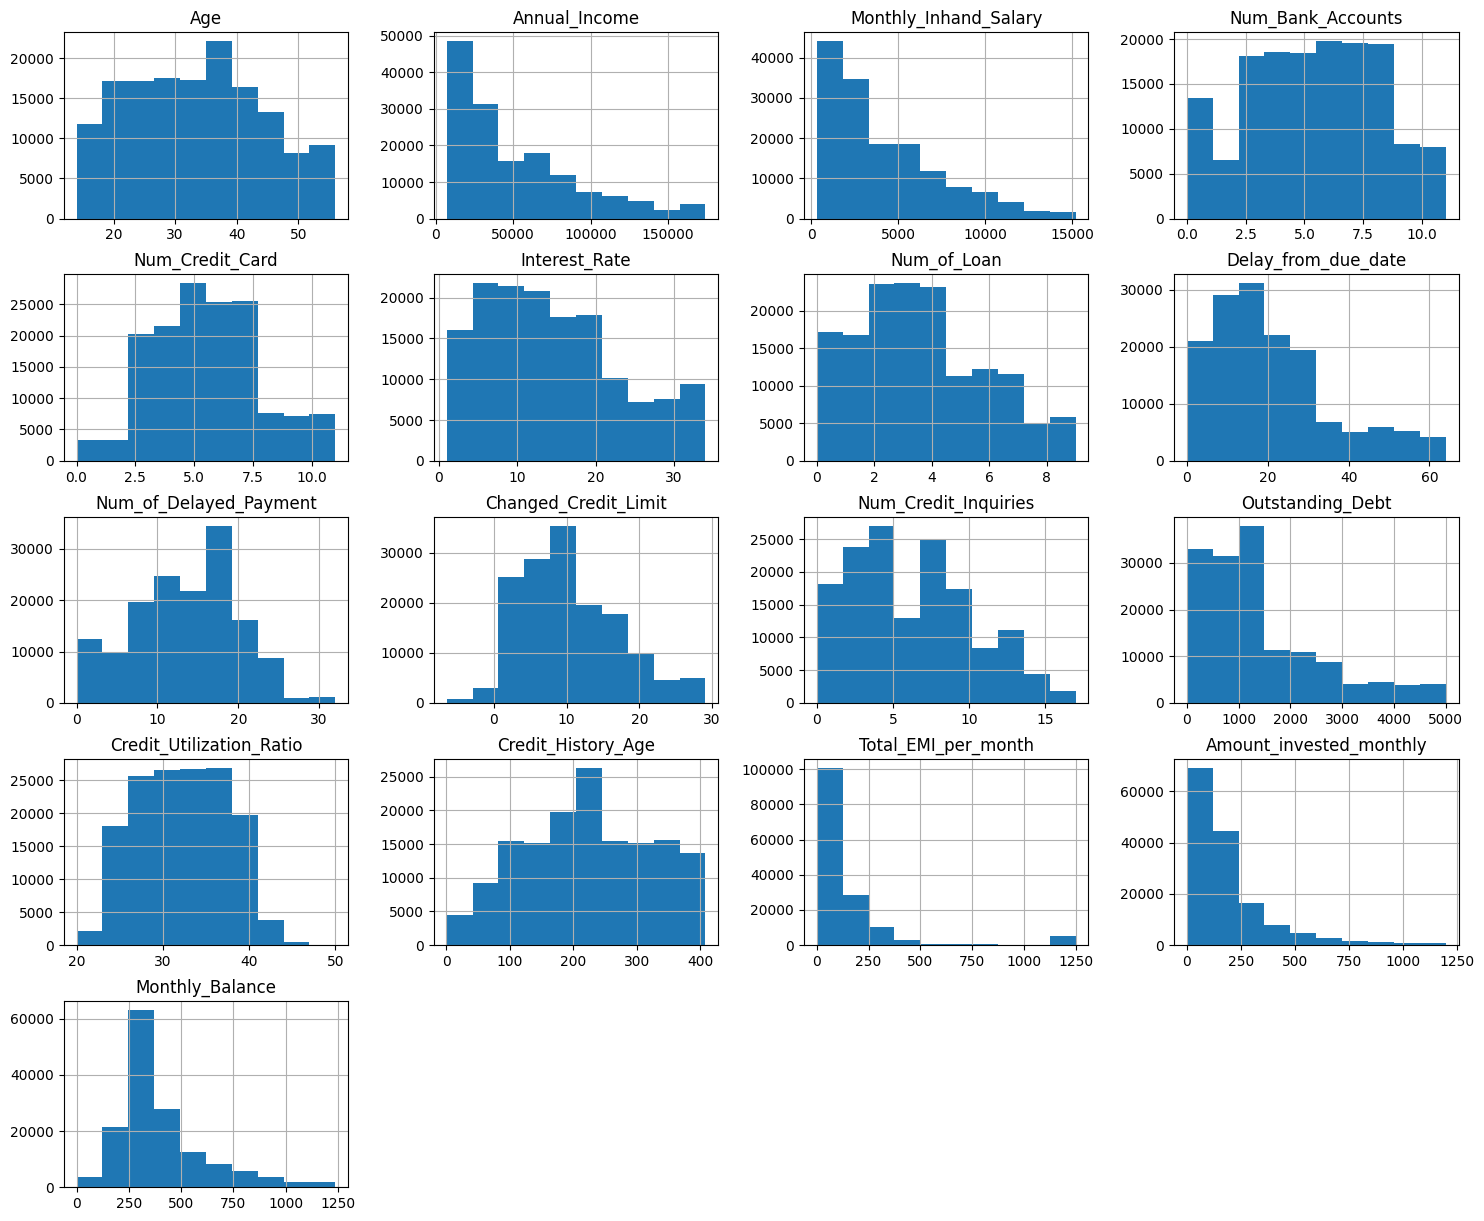

In [ ]:
# Распределения после работы с выбросами
main_full_compl.select_dtypes(include = ['Int16', 'Float32']).hist(figsize = (18, 15))

In [ ]:
# Нормализация
from sklearn import preprocessing
main_full_norm = main_full_compl.copy()

In [ ]:
# Используем масштабирование в данной задаче, чтобы признаки находились в пределах одного диапазона, но при этом сохранялось их исходное распределение.
# Таким образом, будет сохранена уникальность каждого признака

num_cols = main_full_norm.select_dtypes(exclude = 'category').columns

def Scal(df_num, cols):
    scaler = preprocessing.RobustScaler()
    df_temp = scaler.fit_transform(df_num)
    df_temp = pd.DataFrame(df_temp, columns = cols)
    return df_temp
main_full_norm[num_cols] = Scal(main_full_norm[num_cols], num_cols)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>],
       [<Axes: title={'center': 'Num_Credit_Card'}>,
        <Axes: title={'center': 'Interest_Rate'}>,
        <Axes: title={'center': 'Num_of_Loan'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>],
       [<Axes: title={'center': 'Num_of_Delayed_Payment'}>,
        <Axes: title={'center': 'Changed_Credit_Limit'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>,
        <Axes: title={'center': 'Outstanding_Debt'}>],
       [<Axes: title={'center': 'Credit_Utilization_Ratio'}>,
        <Axes: title={'center': 'Credit_History_Age'}>,
        <Axes: title={'center': 'Total_EMI_per_month'}>,
        <Axes: title={'center': 'Amount_invested_monthly'}>],
       [<Axes: title={'center': 'Monthly_Balance'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

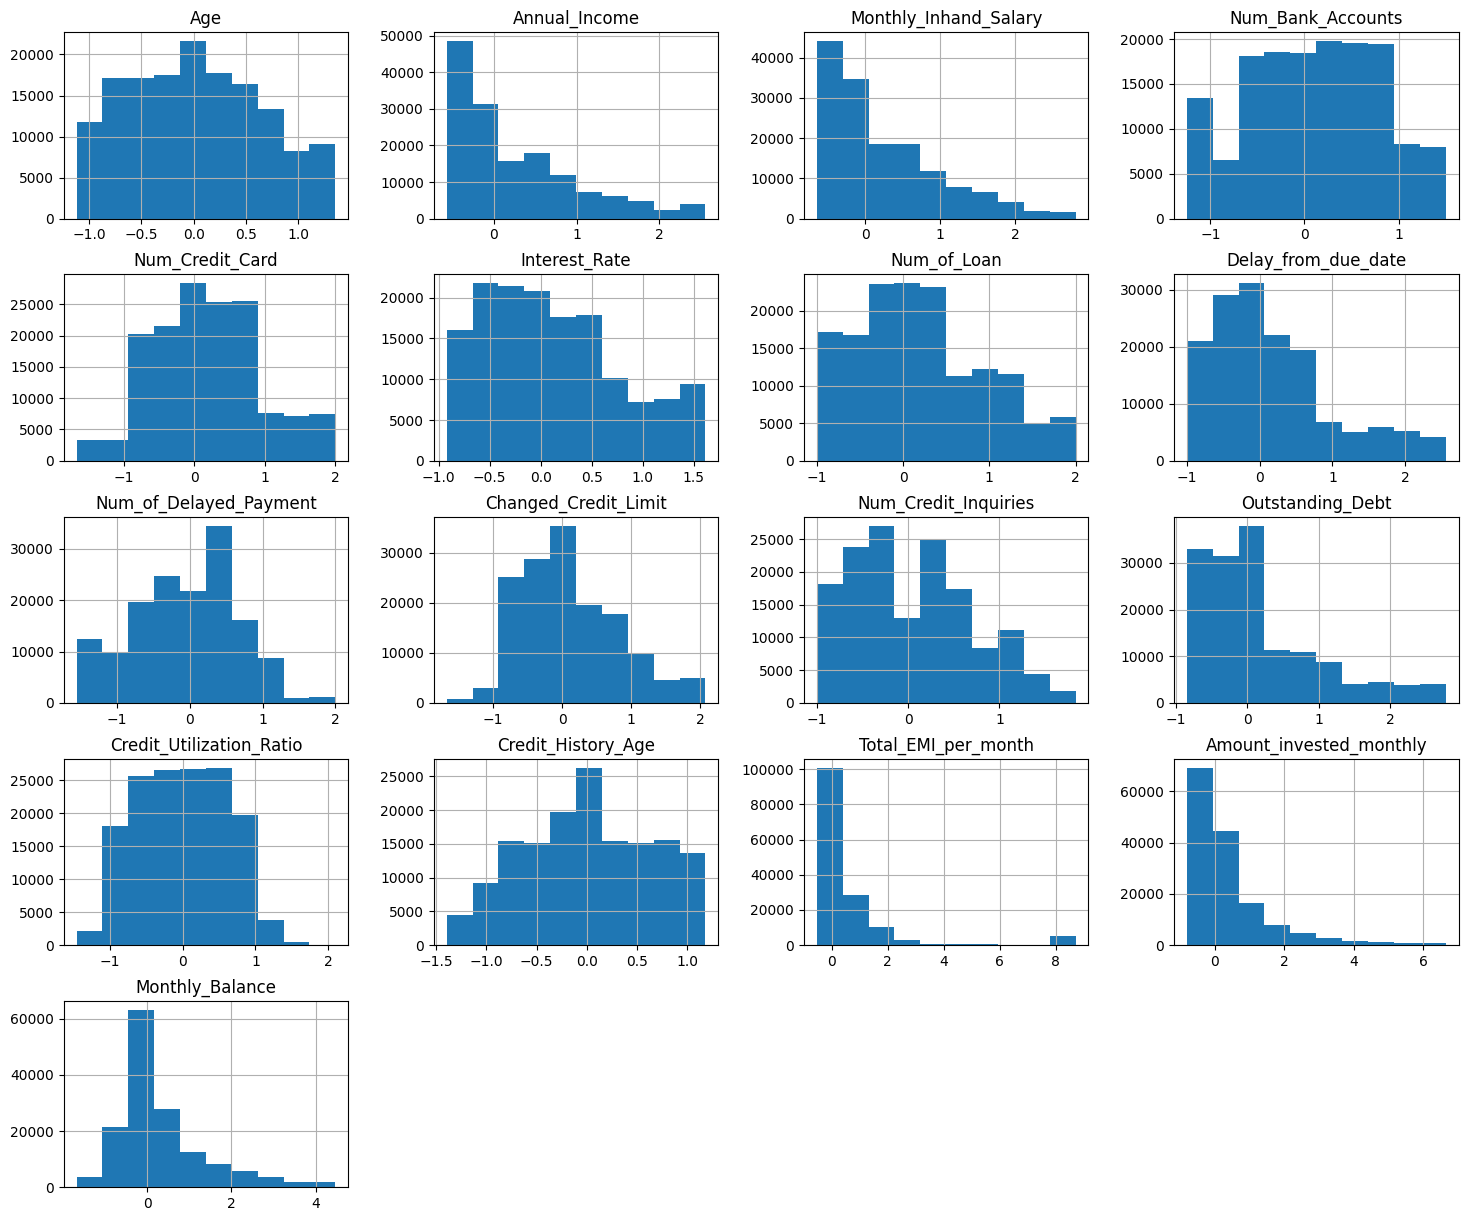

In [ ]:
main_full_norm.select_dtypes(include = ['float64']).hist(figsize = (18, 15))

In [ ]:
main_train_norm = main_full_norm.copy()

In [ ]:
# в этом датасете удалены строки с пустой целевой переменной
main_train_norm = main_train_norm[~main_train_norm["Credit_Score"].isna()]

In [ ]:
# Удаление дубликатов. Всего в датасете должно быть 12500 заемщиков
main_train_norm = main_train_norm.drop_duplicates(subset = 'Customer_ID', keep = 'last').reset_index().drop(columns = ['index'], axis = 1)

In [ ]:
# Удаление категорий, которые не нужны для машинного обучения: не имеют смысла для задачи, несбалансированные или могут наводить на информацию из других столбцов
main_train_norm = main_train_norm.drop(columns = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Credit_Mix', 'Type_of_Loan', 'Payment_of_Min_Amount'], axis = 1)

In [ ]:
main_train_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       12500 non-null  float64 
 1   Occupation                12500 non-null  category
 2   Annual_Income             12500 non-null  float64 
 3   Monthly_Inhand_Salary     12500 non-null  float64 
 4   Num_Bank_Accounts         12500 non-null  float64 
 5   Num_Credit_Card           12500 non-null  float64 
 6   Interest_Rate             12500 non-null  float64 
 7   Num_of_Loan               12500 non-null  float64 
 8   Delay_from_due_date       12500 non-null  float64 
 9   Num_of_Delayed_Payment    12500 non-null  float64 
 10  Changed_Credit_Limit      12500 non-null  float64 
 11  Num_Credit_Inquiries      12500 non-null  float64 
 12  Outstanding_Debt          12500 non-null  float64 
 13  Credit_Utilization_Ratio  12500 non-null  floa

In [ ]:
correl2 = main_train_norm.select_dtypes(exclude = 'category').corr()

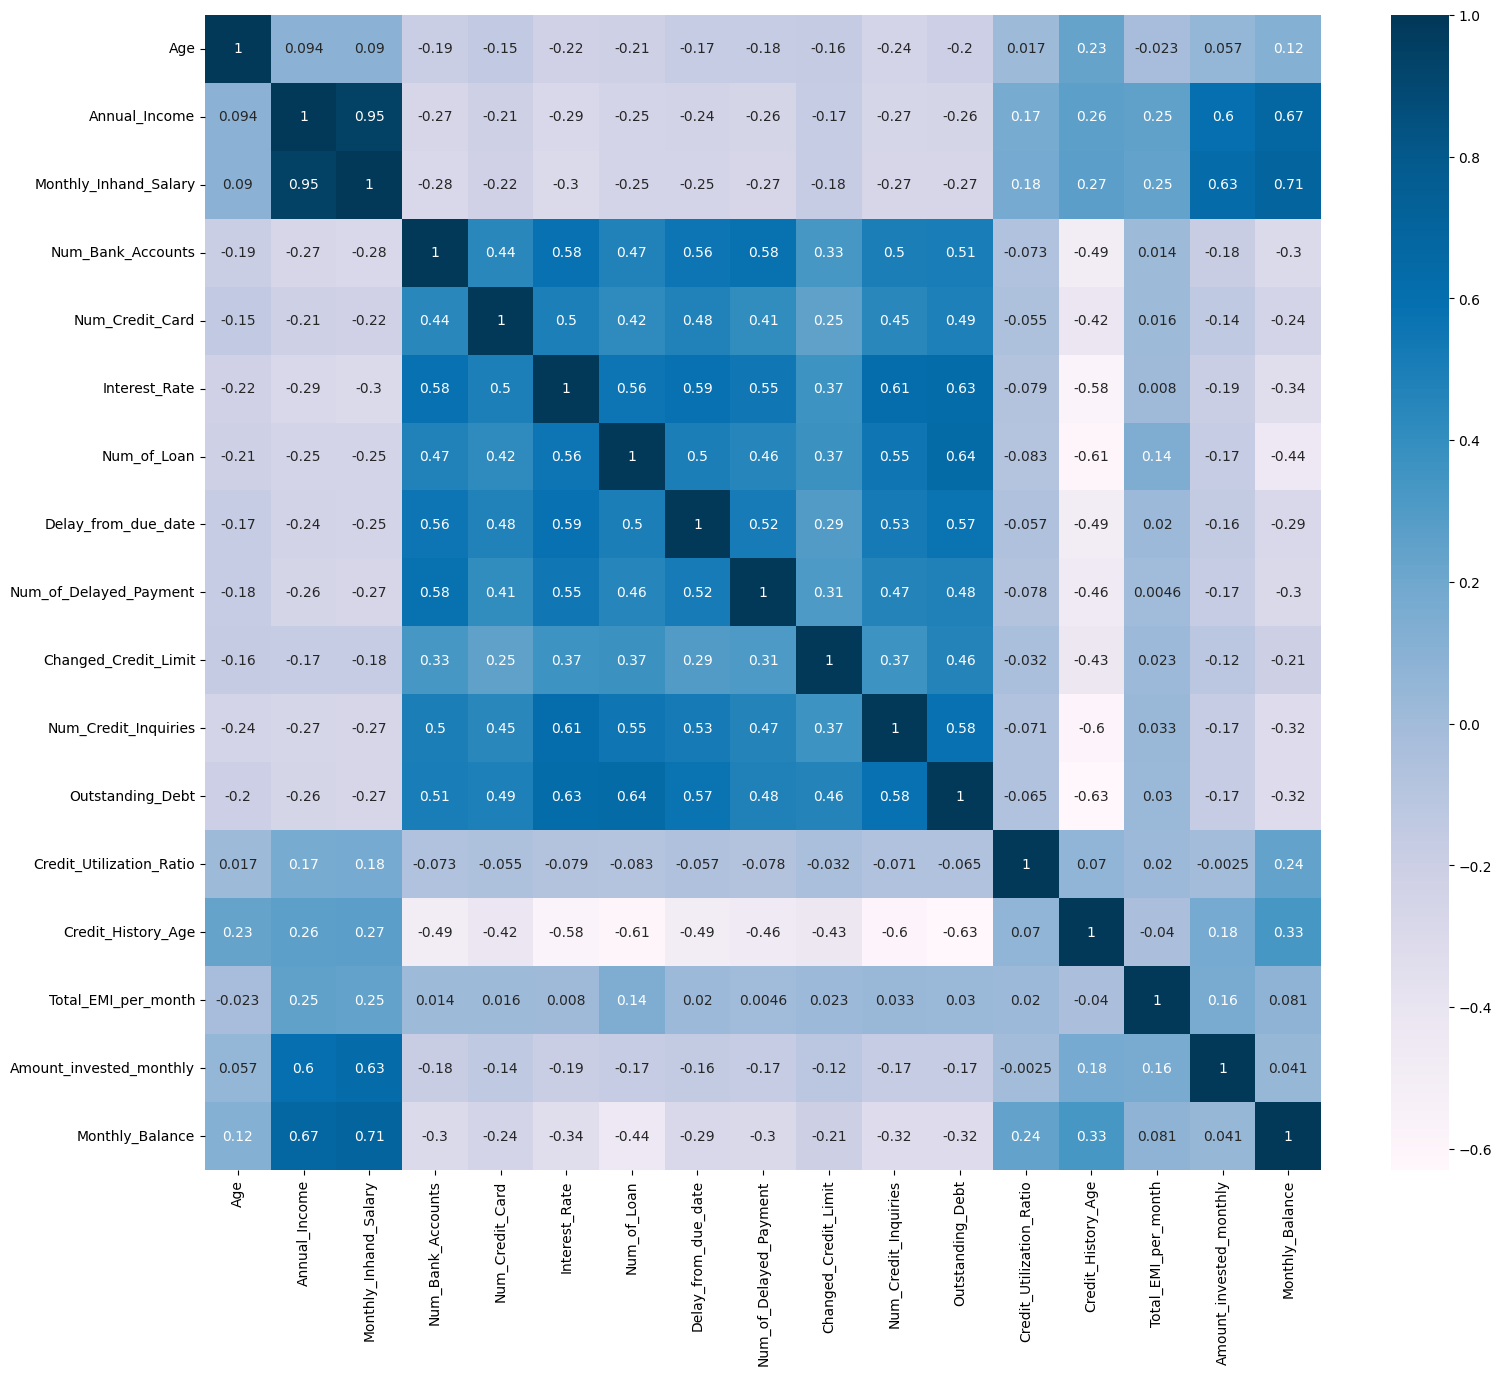

In [ ]:
# теперь можно явно увидеть признаки, которые коррелируют
plt.figure(figsize = (18, 15))
hm = sns.heatmap(
        data = correl2,
        annot = True,
        cmap = 'PuBu'
    )

In [ ]:
# Удаление признака Monthly_Inhand_Salary из-за высокой корреляции с Annual_Income и потенциальной высокой корреляции с Monthly_Balance
main_train_norm = main_train_norm.drop(columns = ['Monthly_Inhand_Salary'], axis = 1)

In [ ]:
main_train_fin = main_train_norm.copy()

In [ ]:
# Теперь нужно модифицировать целевую переменную по требованию заказчика
'''
Данные о рейтинге профессий для банка
Lawyer  +0.3
Engineer +0.35
Architect +0.5
Mechanic  -0.5
Accountant +0.2
Scientist +0.25
Developer +0.4
Media_Manager -0.25
Teacher -0.15
Entrepreneur -0.3
Doctor +0.15
Journalist -0.45
Manager +0.05
Musician  -0.1
Writer -0.35
'''
# Сначала присвоим каждой группе ее средний балл
main_train_fin['Credit_Score'].replace({"Poor":0.2, "Standard":0.5, "Good":0.8}, inplace=True)

In [ ]:
# Создание столбца для скорректированного значения целевой переменной
main_train_fin.insert(19, "cor_num_Credit_Score", np.nan)

In [ ]:
# Функция для коррекции скорингового балла в зависимости от профессии
def cor_num_Credit_Score(main_train_fin):
    if main_train_fin['Occupation'] == 'Lawyer':
        main_train_fin['cor_num_Credit_Score'] = main_train_fin['Credit_Score'] + 0.3
    elif main_train_fin['Occupation'] == 'Engineer':
        main_train_fin['cor_num_Credit_Score'] = main_train_fin['Credit_Score'] + 0.35
    elif main_train_fin['Occupation'] == 'Architect':
        main_train_fin['cor_num_Credit_Score'] = main_train_fin['Credit_Score'] + 0.5
    elif main_train_fin['Occupation'] == 'Mechanic':
        main_train_fin['cor_num_Credit_Score'] = main_train_fin['Credit_Score'] - 0.5
    elif main_train_fin['Occupation'] == 'Accountant':
        main_train_fin['cor_num_Credit_Score'] = main_train_fin['Credit_Score'] + 0.2
    elif main_train_fin['Occupation'] == 'Scientist':
        main_train_fin['cor_num_Credit_Score'] = main_train_fin['Credit_Score'] + 0.25
    elif main_train_fin['Occupation'] == 'Developer':
        main_train_fin['cor_num_Credit_Score'] = main_train_fin['Credit_Score'] + 0.4
    elif main_train_fin['Occupation'] == 'Media_Manager':
        main_train_fin['cor_num_Credit_Score'] = main_train_fin['Credit_Score'] - 0.25
    elif main_train_fin['Occupation'] == 'Teacher':
        main_train_fin['cor_num_Credit_Score'] = main_train_fin['Credit_Score'] - 0.15
    elif main_train_fin['Occupation'] == 'Entrepreneur':
        main_train_fin['cor_num_Credit_Score'] = main_train_fin['Credit_Score'] - 0.3
    elif main_train_fin['Occupation'] == 'Doctor':
        main_train_fin['cor_num_Credit_Score'] = main_train_fin['Credit_Score'] + 0.15
    elif main_train_fin['Occupation'] == 'Journalist':
        main_train_fin['cor_num_Credit_Score'] = main_train_fin['Credit_Score'] - 0.45
    elif main_train_fin['Occupation'] == 'Manager':
        main_train_fin['cor_num_Credit_Score'] = main_train_fin['Credit_Score'] + 0.05
    elif main_train_fin['Occupation'] == 'Musician':
        main_train_fin['cor_num_Credit_Score'] = main_train_fin['Credit_Score'] - 0.1
    elif main_train_fin['Occupation'] == 'Writer':
        main_train_fin['cor_num_Credit_Score'] = main_train_fin['Credit_Score'] - 0.35
    else:
        pass
    return main_train_fin

In [ ]:
main_train_fin = main_train_fin.apply(cor_num_Credit_Score, axis=1)

In [ ]:
# Функция для преобразования скорингового балла обратно в одну из трех групп-категорий
def cor_Credit_Score(cor_num_Credit_Score):
    if cor_num_Credit_Score <= 0.3:
        return 'Poor'
    elif 0.3 < cor_num_Credit_Score < 0.7:
        return 'Standard'
    elif 0.7 <= cor_num_Credit_Score:
        return 'Good'

main_train_fin['cor_Credit_Score'] = main_train_fin['cor_num_Credit_Score'].apply(cor_Credit_Score)

In [ ]:
main_train_fin.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,cor_num_Credit_Score,cor_Credit_Score
0,-0.588235,Scientist,-0.346157,-0.50,-0.333333,-0.769231,0.333333,-0.833333,-0.888889,0.197050,...,-0.258118,-0.991704,0.306962,-0.160384,-0.652521,High_spent_Medium_value_payments,0.102628,0.5,0.75,Good
1,-0.294118,Teacher,-0.051194,-0.75,-0.333333,-0.538462,-0.666667,-0.833333,-1.111111,-0.419389,...,-0.406645,0.075511,0.661392,-0.387668,0.558358,Low_spent_Small_value_payments,0.092482,0.8,0.65,Standard
2,0.058824,Engineer,1.979401,-1.00,0.000000,-0.384615,0.000000,-0.555556,-0.888889,-0.242360,...,0.099178,0.720685,-0.009494,1.298382,1.776736,High_spent_Small_value_payments,2.767141,0.5,0.85,Good
3,1.294118,Entrepreneur,-0.129144,-0.75,0.000000,-0.692308,-0.666667,-0.777778,-0.555556,-0.780822,...,-0.386766,-0.588689,-0.047468,-0.405408,-0.023549,High_spent_Small_value_payments,0.207212,0.5,0.20,Poor
4,-0.705882,Developer,-0.038074,0.50,0.000000,-0.615385,-1.000000,-0.944444,0.111111,-0.718651,...,-0.161096,-0.762951,0.971519,-0.526706,0.323982,High_spent_Small_value_payments,0.131763,0.5,0.90,Good


In [ ]:
# Удаление колонок с промежуточными преобразованиями
main_train_fin = main_train_fin.drop(columns = ['Credit_Score', 'cor_num_Credit_Score'], axis = 1)

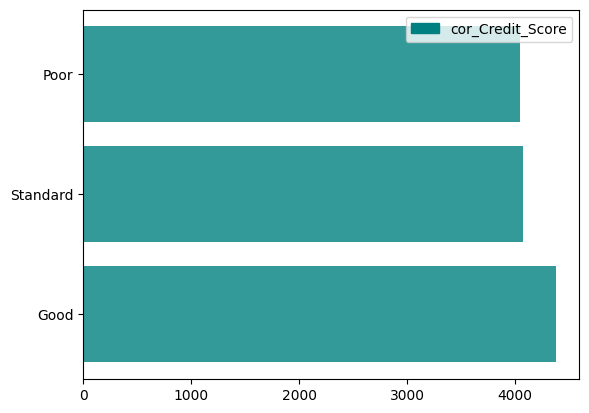

In [ ]:
# Посмотрим, как изменилось распределение скоринговых групп. Оно стало более сбалансированным
cat_counts555 = main_train_fin['cor_Credit_Score'].value_counts()

plt.barh(cat_counts555.index, cat_counts555.values, color = 'teal', alpha = 0.8)

tl_patch = mpatches.Patch(color='teal', label ='cor_Credit_Score')
plt.legend(handles=[tl_patch])

In [ ]:
# кодирование признаков-категорий
main_train_fin = pd.get_dummies(main_train_fin, columns = ['Occupation', 'Payment_Behaviour'])

In [ ]:
main_train_fin

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,-0.588235,-0.346157,-0.50,-0.333333,-0.769231,0.333333,-0.833333,-0.888889,0.197050,-0.333333,...,0,1,0,0,0,1,0,0,0,0
1,-0.294118,-0.051194,-0.75,-0.333333,-0.538462,-0.666667,-0.833333,-1.111111,-0.419389,-0.666667,...,0,0,1,0,0,0,0,0,0,1
2,0.058824,1.979401,-1.00,0.000000,-0.384615,0.000000,-0.555556,-0.888889,-0.242360,-0.500000,...,0,0,0,0,0,0,1,0,0,0
3,1.294118,-0.129144,-0.75,0.000000,-0.692308,-0.666667,-0.777778,-0.555556,-0.780822,-0.333333,...,0,0,0,0,0,0,1,0,0,0
4,-0.705882,-0.038074,0.50,0.000000,-0.615385,-1.000000,-0.944444,0.111111,-0.718651,-0.333333,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,-0.823529,0.099832,-1.25,-0.333333,-0.538462,-0.666667,-0.500000,-1.555556,-0.453109,-0.833333,...,0,0,0,0,0,1,0,0,0,0
12496,0.705882,-0.391783,-1.00,-1.333333,-0.615385,0.333333,-0.944444,-1.555556,-0.390938,0.333333,...,0,0,0,0,0,0,0,1,0,0
12497,1.000000,-0.007321,-1.00,-0.333333,-0.615385,0.000000,-0.611111,-0.555556,-0.423604,-0.500000,...,0,0,0,1,0,1,0,0,0,0
12498,-0.235294,-0.329495,1.25,1.000000,1.230769,0.666667,0.833333,1.222222,0.938883,0.500000,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# кодирование целевой переменной
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
main_train_fin.cor_Credit_Score = label_encoder.fit_transform(main_train_fin.cor_Credit_Score)
label_encoder.classes_

array(['Good', 'Poor', 'Standard'], dtype=object)

In [ ]:
# Формирование X и y

X = main_train_fin.drop(columns = ['cor_Credit_Score'], axis=1)
y = main_train_fin['cor_Credit_Score']

# Подбор модели машинного обучения

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Разделение данных на данные для обучения и проверки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
# Сначала воспользуемся моделью LDA
lda = LinearDiscriminantAnalysis(solver='svd')

In [ ]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# прогноз на тестовой выборке
y_pred = lda.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Посмотрим на матрицу ошибок
cm_lda = confusion_matrix(y_true = y_test, y_pred = y_pred)

In [ ]:
df_cm_lda = pd.DataFrame(cm_lda, columns=['predicted Good','predicted Poor','predicted Standart'])
df_cm_lda.rename(index={0:'Good',1:'Poor',2:'Standart'})

,predicted Good,predicted Poor,predicted Standart
Good,775,0,90
Poor,0,680,134
Standart,230,158,433


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
report = classification_report(y_test, y_pred, target_names=['Good', 'Poor', 'Standart'], digits=3)
print(report)
# recall показывает, какую долю объектов класса из всех объектов этого класса нашел алгоритм
# Precision можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными

              precision    recall  f1-score   support

        Good      0.771     0.896     0.829       865
        Poor      0.811     0.835     0.823       814
    Standart      0.659     0.527     0.586       821

    accuracy                          0.755      2500
   macro avg      0.747     0.753     0.746      2500
weighted avg      0.747     0.755     0.747      2500



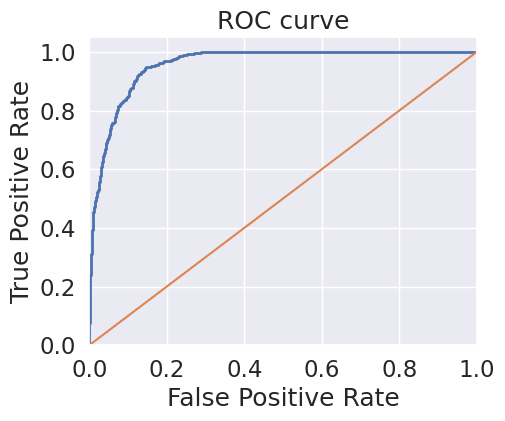

In [ ]:
from sklearn import metrics
sns.set(font_scale=1.5)
sns.set_color_codes("muted")
plt.figure(figsize=(5, 4))
fpr, tpr, thresholds = metrics.roc_curve(y_test, lda.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [ ]:
metrics.auc(fpr, tpr)

0.958144249069516

In [ ]:
# коэффициенты дискриминатных линий
lda.coef_

array([[ 8.86970902e-02, -9.84799541e-02, -1.73356624e-01,
        -3.90484248e-01, -5.36458422e-01, -1.06754546e-01,
        -2.67845699e-01, -2.10851291e-02,  2.10270717e-01,
        -3.16469741e-01,  9.18519954e-03, -2.45289021e-02,
         1.75975789e-01,  6.50648776e-02,  1.18189811e-01,
        -9.24045812e-02,  3.68082280e+00,  5.85231452e+00,
         3.87142258e+00,  2.49943840e-01,  3.86998829e+00,
        -4.45529146e+00, -4.34097576e+00,  4.00000698e+00,
        -9.06006848e-01, -4.40102257e+00, -4.37972242e+00,
        -8.58051364e-01,  3.79355547e+00, -2.35768843e+00,
        -4.52533411e+00,  3.56955616e-01,  1.73497502e-01,
         1.31343423e-01,  3.37996608e-03, -1.21648466e-01,
        -3.59811600e-01],
       [-8.87220380e-02,  1.75014489e-01,  1.43533755e-01,
         4.34309524e-01,  5.84716176e-01,  1.41127608e-01,
         2.62948656e-01,  4.52306000e-02, -1.46263085e-01,
         2.49440507e-01, -3.91973095e-02,  5.00770352e-02,
        -2.41645263e-01, -8.39

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Посмотрим, насколько будет точна модель логистической регрессии
lr = LogisticRegression(solver = 'saga', multi_class = 'multinomial', max_iter = 200)

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=200, multi_class='multinomial', solver='saga')

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
cm_lr = confusion_matrix(y_true = y_test, y_pred = y_pred)

In [ ]:
df_cm_lr = pd.DataFrame(cm_lr, columns=['predicted Good','predicted Poor','predicted Standart'])
df_cm_lr.rename(index={0:'Good',1:'Poor',2:'Standart'})

,predicted Good,predicted Poor,predicted Standart
Good,725,2,138
Poor,4,738,72
Standart,147,194,480


In [ ]:
report = classification_report(y_test, y_pred, target_names=['Good', 'Poor', 'Standart'], digits=3)
print(report)

              precision    recall  f1-score   support

        Good      0.828     0.838     0.833       865
        Poor      0.790     0.907     0.844       814
    Standart      0.696     0.585     0.635       821

    accuracy                          0.777      2500
   macro avg      0.771     0.776     0.771      2500
weighted avg      0.772     0.777     0.772      2500



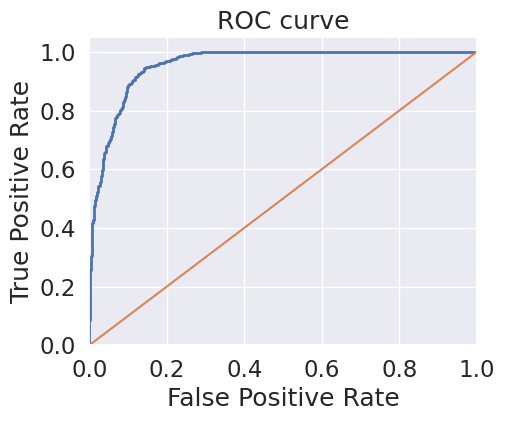

In [ ]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")
plt.figure(figsize=(5, 4))
fpr, tpr, thresholds = metrics.roc_curve(y_test, lr.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [ ]:
metrics.auc(fpr, tpr)

0.957488465495583

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Случайный лес
rfc = RandomForestClassifier(n_estimators = 60, criterion = "entropy", random_state = 99)

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=60, random_state=99)

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
cm_rfc = confusion_matrix(y_true = y_test, y_pred = y_pred)

In [ ]:
df_cm_rfc = pd.DataFrame(cm_rfc, columns=['predicted Good','predicted Poor','predicted Standart'])
df_cm_rfc.rename(index={0:'Good',1:'Poor',2:'Standart'})

,predicted Good,predicted Poor,predicted Standart
Good,740,3,122
Poor,9,717,88
Standart,150,176,495


In [ ]:
report = classification_report(y_test, y_pred, target_names=['Good', 'Poor', 'Standart'], digits=3)
print(report)

              precision    recall  f1-score   support

        Good      0.823     0.855     0.839       865
        Poor      0.800     0.881     0.839       814
    Standart      0.702     0.603     0.649       821

    accuracy                          0.781      2500
   macro avg      0.775     0.780     0.775      2500
weighted avg      0.776     0.781     0.776      2500



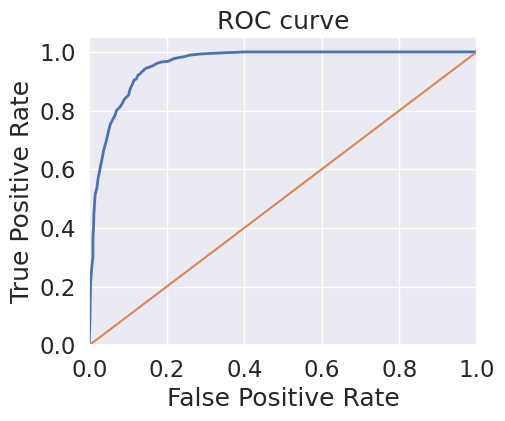

In [ ]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")
plt.figure(figsize=(5, 4))
fpr, tpr, thresholds = metrics.roc_curve(y_test, rfc.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [ ]:
metrics.auc(fpr, tpr)

0.9580546253144118

In [ ]:
# Посмотрим на метод опорных векторов
from sklearn.svm import SVC

In [ ]:
svc_m = SVC(kernel = 'rbf', random_state = 99)

In [ ]:
svc_m.fit(X_train, y_train)

SVC(random_state=99)

In [ ]:
y_pred = svc_m.predict(X_test)

In [ ]:
report = classification_report(y_test, y_pred, target_names=['Good', 'Poor', 'Standart'], digits=3)
print(report)

              precision    recall  f1-score   support

        Good      0.845     0.832     0.839       865
        Poor      0.794     0.888     0.838       814
    Standart      0.685     0.615     0.648       821

    accuracy                          0.779      2500
   macro avg      0.775     0.779     0.775      2500
weighted avg      0.776     0.779     0.776      2500



In [ ]:
cm_svc_m = confusion_matrix(y_true = y_test, y_pred = y_pred)

In [ ]:
df_cm_svc_m = pd.DataFrame(cm_svc_m, columns=['predicted Good','predicted Poor','predicted Standart'])
df_cm_svc_m.rename(index={0:'Good',1:'Poor',2:'Standart'})

,predicted Good,predicted Poor,predicted Standart
Good,720,2,143
Poor,2,723,89
Standart,130,186,505


In [ ]:
# модель KNN
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knc = KNeighborsClassifier(n_neighbors = 37)

In [ ]:
knc.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=37)

In [ ]:
y_pred = knc.predict(X_test)

In [ ]:
cm_knc = confusion_matrix(y_true = y_test, y_pred = y_pred)

In [ ]:
df_cm_knc = pd.DataFrame(cm_knc, columns=['predicted Good','predicted Poor','predicted Standart'])
df_cm_knc.rename(index={0:'Good',1:'Poor',2:'Standart'})

,predicted Good,predicted Poor,predicted Standart
Good,712,52,101
Poor,102,615,97
Standart,255,192,374


In [ ]:
report = classification_report(y_test, y_pred, target_names=['Good', 'Poor', 'Standart'], digits=3)
print(report)

              precision    recall  f1-score   support

        Good      0.666     0.823     0.736       865
        Poor      0.716     0.756     0.735       814
    Standart      0.654     0.456     0.537       821

    accuracy                          0.680      2500
   macro avg      0.679     0.678     0.669      2500
weighted avg      0.678     0.680     0.670      2500



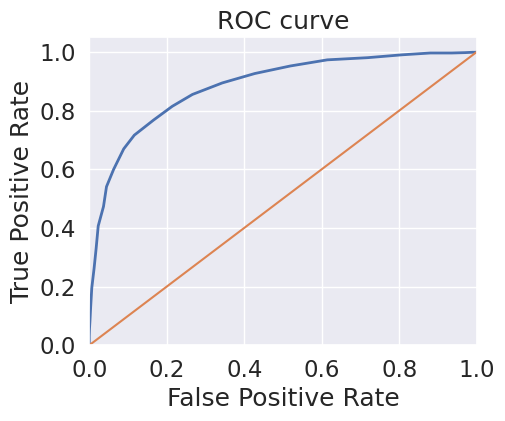

In [ ]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")
plt.figure(figsize=(5, 4))
fpr, tpr, thresholds = metrics.roc_curve(y_test, knc.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [ ]:
metrics.auc(fpr, tpr)

0.8828449931652779

In [ ]:
# XGBoost
import xgboost as xgb

In [ ]:
xgbo = xgb.XGBClassifier(n_estimators = 25, random_state = 55)

In [ ]:
xgbo.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=25, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred = xgbo.predict(X_test)

In [ ]:
report = classification_report(y_test, y_pred, target_names=['Good', 'Poor', 'Standart'], digits=3)
print(report)

              precision    recall  f1-score   support

        Good      0.823     0.857     0.840       865
        Poor      0.797     0.898     0.845       814
    Standart      0.707     0.588     0.642       821

    accuracy                          0.782      2500
   macro avg      0.776     0.781     0.776      2500
weighted avg      0.777     0.782     0.776      2500



In [ ]:
cm_xgbo = confusion_matrix(y_true = y_test, y_pred = y_pred)

In [ ]:
df_cm_xgbo = pd.DataFrame(cm_xgbo, columns=['predicted Good','predicted Poor','predicted Standart'])
df_cm_xgbo.rename(index={0:'Good',1:'Poor',2:'Standart'})

,predicted Good,predicted Poor,predicted Standart
Good,741,2,122
Poor,5,731,78
Standart,154,184,483


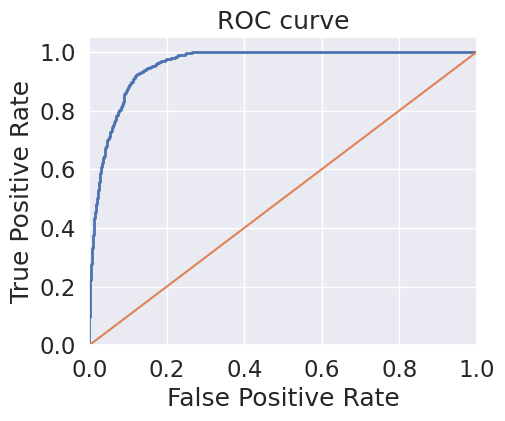

In [ ]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")
plt.figure(figsize=(5, 4))
fpr, tpr, thresholds = metrics.roc_curve(y_test, xgbo.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [ ]:
metrics.auc(fpr, tpr)

0.9579722880434625

In [ ]:
# модель XGBoost показала себя лучше на данном датасете не только точностью, но  и тем, что при такой точности у нее минимальное количество ошибок в случае
#Poor - predicted Good - что более ценно , т. к. это самая критическая ошибка - выдать кредит заемщику с плохим скоринговым баллом

# Сравнение результатов применения модели при обучении на подготовленном датасете и датасете с экспертно отобранными признаками

In [ ]:
main_train_expert = main_train_fin.copy()

In [ ]:
# Добавление экспертного признака
main_train_expert.insert(38, "expert_x", np.nan)

In [ ]:
def add_expert_feature(main_train_expert):
    main_train_expert['expert_x'] = main_train_expert['Total_EMI_per_month'] / main_train_expert['Amount_invested_monthly']

    return main_train_expert

In [ ]:
main_train_expert = main_train_expert.apply(add_expert_feature, axis=1)

In [ ]:
# Удаление не экспертных признаков
main_train_expert = main_train_expert.drop(columns = ['Monthly_Balance', 'Credit_History_Age', 'Num_of_Delayed_Payment', 'Interest_Rate', 'Num_Bank_Accounts'], axis=1)

In [ ]:
# Экспертные признаки
main_train_expert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 12500 non-null  float64
 1   Annual_Income                                       12500 non-null  float64
 2   Num_Credit_Card                                     12500 non-null  float64
 3   Num_of_Loan                                         12500 non-null  float64
 4   Delay_from_due_date                                 12500 non-null  float64
 5   Changed_Credit_Limit                                12500 non-null  float64
 6   Num_Credit_Inquiries                                12500 non-null  float64
 7   Outstanding_Debt                                    12500 non-null  float64
 8   Credit_Utilization_Ratio                            12500 non-null  float64


In [ ]:
X_e = main_train_expert.drop(columns = ['cor_Credit_Score'], axis=1)
y_e = main_train_expert['cor_Credit_Score']

In [ ]:
# Разделение данных "экспертного датасета" на данные для обучения и проверки
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X_e, y_e, test_size = 0.2, random_state = 25)

In [ ]:
xgbo_e = xgb.XGBClassifier(n_estimators = 25, random_state = 55)

In [ ]:
xgbo_e.fit(X_train_e, y_train_e)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=25, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_e = xgbo_e.predict(X_test_e)

In [ ]:
report_e = classification_report(y_test_e, y_pred_e, target_names=['Good', 'Poor', 'Standart'], digits=3)
print(report_e)

              precision    recall  f1-score   support

        Good      0.827     0.865     0.846       865
        Poor      0.793     0.896     0.841       814
    Standart      0.706     0.582     0.638       821

    accuracy                          0.782      2500
   macro avg      0.776     0.781     0.775      2500
weighted avg      0.776     0.782     0.776      2500



In [ ]:
cm_xgbo_e = confusion_matrix(y_true = y_test_e, y_pred = y_pred_e)

In [ ]:
df_cm_xgbo_e = pd.DataFrame(cm_xgbo_e, columns=['predicted Good','predicted Poor','predicted Standart'])
df_cm_xgbo_e.rename(index={0:'Good',1:'Poor',2:'Standart'})

,predicted Good,predicted Poor,predicted Standart
Good,748,1,116
Poor,2,729,83
Standart,154,189,478


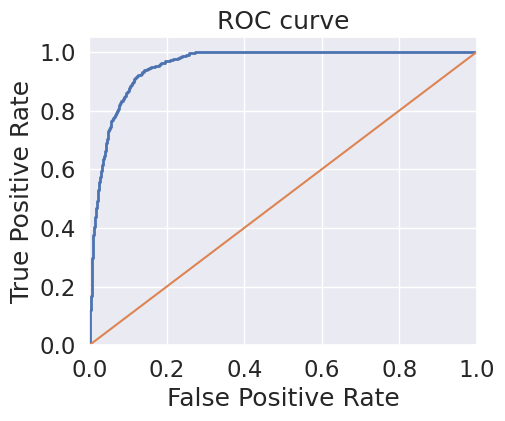

In [ ]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")
plt.figure(figsize=(5, 4))
fpr, tpr, thresholds = metrics.roc_curve(y_test_e, xgbo_e.predict_proba(X_test_e)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [ ]:
metrics.auc(fpr, tpr)

0.9567321284403136

In [ ]:
# Метрики качества исходной выбранной модели схожи с метриками качества на основе экспертно отобранных признаков.
# При этом на основе этих признаков модель лучше определяет заемщиков групп Good и Poor, что критичнее для банка

In [ ]:
# Посмотрим на идеальных заемщиков по мнению банка. Вернемся к датасету до нормализации main_full_compl
ideal = main_full_compl[~main_full_compl["Credit_Score"].isna()]
ideal = ideal.drop_duplicates(subset = 'Customer_ID', keep = 'last').reset_index().drop(columns = ['index'], axis = 1)
ideal = ideal.drop(columns = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Credit_Mix', 'Type_of_Loan', 'Payment_of_Min_Amount'], axis = 1)
ideal['Credit_Score'].replace({"Poor":0.2, "Standard":0.5, "Good":0.8}, inplace=True)

In [ ]:
ideal.insert(20, "cor_num_Credit_Score", np.nan)
main_train_fin = ideal
main_train_fin = main_train_fin.apply(cor_num_Credit_Score, axis=1)

In [ ]:
main_train_good = main_train_fin[main_train_fin["cor_num_Credit_Score"] > 1.2]

In [ ]:
# Средние значения или медиана могут отражать значения параметров идеального заемщика
main_train_good.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,332.0,35.934191,1.075678e+01,14.000000,27.000000,36.000000,45.000000,56.000000
Annual_Income,332.0,67674.641619,4.644593e+04,7710.839844,29136.324707,57619.400391,105787.208984,174145.593750
Monthly_Inhand_Salary,332.0,5473.368609,3.760236e+03,525.829590,2338.809265,4418.761719,8576.563232,14867.813477
Num_Bank_Accounts,332.0,4.000000,2.208197e+00,0.000000,3.000000,4.000000,5.000000,10.000000
Num_Credit_Card,332.0,4.367470,1.850262e+00,1.000000,3.000000,4.000000,6.000000,10.000000
Interest_Rate,332.0,8.518072,5.660829e+00,1.000000,4.000000,8.000000,11.000000,33.000000
Num_of_Loan,332.0,2.427711,1.759965e+00,0.000000,1.000000,2.000000,4.000000,9.000000
Delay_from_due_date,332.0,12.283133,9.593771e+00,0.000000,5.000000,11.000000,17.000000,59.000000
Num_of_Delayed_Payment,332.0,9.852410,6.071022e+00,0.000000,5.750000,10.000000,14.000000,32.000000
Changed_Credit_Limit,332.0,8.055030,5.386269e+00,-4.060000,4.040000,7.590000,11.205000,27.139999


In [ ]:
main_train_good.select_dtypes(include = ['object']).describe()

,Occupation,Payment_Behaviour
count,332,332
unique,2,6
top,Developer,High_spent_Medium_value_payments
freq,168,75
